In [36]:
# imports and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# supress scientific notation
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 78
pd.options.display.max_rows = 60

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-whitegrid')
sns.set_palette('twilight')
# sns.color_palette("cubehelix", as_cmap=True)
plt.rc('font', size=16)

In [37]:
# Look at CSVs
df = pd.read_csv('ATPUpdated_Combined.csv')
# df.drop(columns = 'Unnamed: 0', inplace=True)
df.sample(5)


,Unnamed: 0,Unnamed: 0.1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,Player1_id,Player1_seed,Player1_entry,Player1_name,Player1_hand,Player1_ht,Player1_ioc,Player1_age,Player2_id,Player2_seed,Player2_entry,Player2_name,Player2_hand,Player2_ht,Player2_ioc,Player2_age,score,best_of,round,minutes,Player1_aces,Player1_double_faults,Player1_service_points,Player1_first_serves_in,Player1_first_serve_points_won,Player1_second_serve_points_won,Player1_service_game_total,Player1_break_points_saved,Player1_break_points_faced,Player2_aces,Player2_double_faults,Player2_service_points,Player2_first_serves_in,Player2_first_serve_points_won,Player2_second_serve_points_won,Player2_service_game_total,Player2_break_points_saved,Player2_break_points_faced,Player1_rank,Player1_rank_points,Player2_rank,Player2_rank_points,Player1_first_serve_%,Player2_first_serve_%,Player1_first_serve_win_%,Player2_first_serve_win_%,Player1_break_points_won,Player2_break_points_won
71113,71113,2544,1992-475,San Marino,Clay,32,A,19920727,21,101086,NaN,NaN,Ronald Agenor,R,180.0,USA,27.701574,102167,NaN,Q,Juan Albert Viloca Puig,R,185.0,ESP,19.523614,6-2 6-3,3,R16,64.0,0.0,1.0,45.0,31.0,22.0,9.0,8.0,1.0,2.0,3.0,6.0,55.0,31.0,21.0,7.0,9.0,6.0,11.0,118.0,326.0,450.0,38.0,0.688889,0.563636,0.709677,0.677419,1.0,5.0
49751,49751,3348,1997-348,Ostrava,Carpet,32,A,19971013,25,102344,8.0,NaN,Karol Kucera,R,188.0,SVK,23.611225,102562,NaN,NaN,Jiri Novak,R,190.0,CZE,22.562628,6-4 6-2,3,QF,67.0,3.0,3.0,46.0,23.0,22.0,14.0,9.0,0.0,0.0,2.0,1.0,63.0,38.0,25.0,11.0,9.0,4.0,7.0,32.0,1149.0,63.0,718.0,0.500000,0.603175,0.956522,0.657895,0.0,3.0
86407,86407,3390,1985-D062,Davis Cup EUR QF: SUI vs ZIM,Clay,4,D,19850614,5,100603,NaN,NaN,Roland Stadler,U,178.0,SUI,25.990418,108007,NaN,NaN,Phillip Tuckniss,R,NaN,ZIM,23.099247,6-2 6-0 6-1,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491.0,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177121,177121,3095,2000-D014,Davis Cup G1 QF: MAR vs UKR,Clay,4,D,20000407,1,102446,NaN,NaN,Andrei Medvedev,R,193.0,UKR,25.590691,102271,NaN,NaN,Hicham Arazi,L,175.0,MAR,26.455852,6-4 1-6 6-2 3-6 7-5,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,943.0,28.0,1040.0,NaN,NaN,NaN,NaN,NaN,NaN
220711,40406,806,1969-417,Boston,Grass,128,A,19690816,270,100203,NaN,NaN,Phil Dent,R,183.0,AUS,19.501711,100105,NaN,NaN,Allan Stone,R,NaN,AUS,23.838467,6-2 8-6,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
'''
Following code is the same as prepare.py
'''

# read .csv into a dataframe
df = pd.read_csv('ATPMain.csv', index_col = 0)

# set index to the tournament start date
df = df.set_index('tourney_date')

# convert index to datetime object and sort in ascending order
df.index = pd.to_datetime(df.index, format = '%Y%m%d')
df = df.sort_index(ascending = True)

# create target variable 
df['player_1_wins'] = np.where(df['winner'] == df['player_1_name'], True, False)

# create dummy columns for surface, level, hand, and round 
dummy_df = pd.get_dummies(df[['surface', 'tourney_level', 'player_1_hand', 'player_2_hand', 'round']], dummy_na=False, drop_first=[False])
# concat dummy columns to df
df = pd.concat([df, dummy_df], axis=1)
    

# drop all walkovers (no useful stats) and best of 1 matches (extremely rare format)
df = df.drop(df[df.score == 'W/O'].index)
df = df.drop(df[df.best_of == 1].index)

df_clean = df = df.dropna(subset=['player_1_aces'])

In [39]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_1_hand_U,player_2_hand_R,player_2_hand_U,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-12-31,1991-354,Wellington,Hard,32,A,30,5-7 6-3 7-6(3),3,SF,142.0,Lars Jonsson,Omar Camporese,20.511978,22.647502,NaN,NaN,R,R,188.0,188.0,101767,101481,SWE,ITA,Lars Jonsson,Omar Camporese,100.0,45.0,NaN,NaN,NaN,6.0,6.0,16.0,5.0,6.0,100.0,130.0,64.0,62.0,45.0,45.0,20.0,28.0,16.0,17.0,1.0,14.0,5.0,19.0,Lars Jonsson,0.640000,0.476923,0.703125,0.725806,5.0,4.0,True,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1990-12-31,1991-354,Wellington,Hard,32,A,12,6-4 1-6 6-4,3,R32,113.0,Karel Novacek,Thomas Hogstedt,25.754962,27.277207,NaN,NaN,R,R,190.0,190.0,101120,100962,CZE,SWE,Karel Novacek,Thomas Hogstedt,34.0,91.0,NaN,NaN,4.0,NaN,4.0,3.0,1.0,4.0,83.0,84.0,56.0,58.0,41.0,39.0,12.0,13.0,14.0,13.0,4.0,8.0,7.0,11.0,Thomas Hogstedt,0.674699,0.690476,0.732143,0.672414,3.0,3.0,False,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1990-12-31,1991-354,Wellington,Hard,32,A,11,6-7(4) 6-2 6-4,3,R32,130.0,Renzo Furlan,Robbie Weiss,20.624230,24.082136,NaN,NaN,R,R,175.0,183.0,101746,101312,ITA,USA,Renzo Furlan,Robbie Weiss,77.0,89.0,NaN,NaN,NaN,NaN,3.0,7.0,1.0,8.0,95.0,127.0,63.0,79.0,42.0,56.0,16.0,19.0,15.0,15.0,6.0,13.0,11.0,15.0,Robbie Weiss,0.663158,0.622047,0.666667,0.708861,2.0,5.0,False,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1990-12-31,1991-354,Wellington,Hard,32,A,10,6-3 6-3,3,R32,70.0,Daniel Vacek,Markus Zoecke,19.750856,22.642026,Q,Q,R,R,190.0,196.0,101888,101482,CZE,GER,Daniel Vacek,Markus Zoecke,607.0,167.0,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,50.0,64.0,33.0,39.0,22.0,30.0,9.0,13.0,9.0,9.0,3.0,1.0,6.0,1.0,Markus Zoecke,0.660000,0.609375,0.666667,0.769231,0.0,3.0,False,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1990-12-31,1991-354,Wellington,Hard,32,A,9,6-1 6-1,3,R32,55.0,Brian Garrow,Omar Camporese,22.729637,22.647502,NaN,NaN,R,R,173.0,188.0,101469,101481,USA,ITA,Brian Garrow,Omar Camporese,95.0,45.0,NaN,NaN,NaN,6.0,1.0,2.0,1.0,1.0,42.0,36.0,29.0,18.0,14.0,14.0,2.0,12.0,7.0,7.0,3.0,0.0,9.0,1.0,Omar Camporese,0.690476,0.500000,0.482759,0.777778,1.0,6.0,False,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [77]:
df.index.max() - df.index.min()

Timedelta('11297 days 00:00:00')

In [79]:
df.index.min()

Timestamp('1990-12-31 00:00:00')

In [78]:
df.index.max()

Timestamp('2021-12-05 00:00:00')

- We need to drop 2019 and above 


In [40]:
df.shape

(65950, 78)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65950 entries, 1990-12-31 to 2021-12-05
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tourney_id                        65950 non-null  object 
 1   tourney_name                      65950 non-null  object 
 2   surface                           65950 non-null  object 
 3   draw_size                         65950 non-null  int64  
 4   tourney_level                     65950 non-null  object 
 5   match_num                         65950 non-null  int64  
 6   score                             65950 non-null  object 
 7   best_of                           65950 non-null  int64  
 8   round                             65950 non-null  object 
 9   minutes                           63794 non-null  float64
 10  player_1                          65950 non-null  object 
 11  player_2                          65950 non-null  

In [53]:
# create a list of colums with numeric values only
cols_to_plot = df.describe().columns

Index(['draw_size', 'match_num', 'best_of', 'minutes', 'player_1_age',
       'player_2_age', 'player_1_ht', 'player_2_ht', 'player_1_id',
       'player_2_id', 'player_1_rank', 'player_2_rank', 'player_1_rank_points',
       'player_2_rank_points', 'player_1_seed', 'player_2_seed',
       'player_1_aces', 'player_2_aces', 'player_1_double_faults',
       'player_2_double_faults', 'player_1_service_points',
       'player_2_service_points', 'player_1_first_serves_in',
       'player_2_first_serves_in', 'player_1_first_serve_points_won',
       'player_2_first_serve_points_won', 'player_1_second_serve_points_won',
       'player_2_second_serve_points_won', 'player_1_service_game_total',
       'player_2_service_game_total', 'player_1_break_points_saved',
       'player_2_break_points_saved', 'player_1_break_points_faced',
       'player_2_break_points_faced', 'player_1_first_serve_%',
       'player_2_first_serve_%', 'player_1_first_serve_win_%',
       'player_2_first_serve_win_%', 'pl

In [69]:
# create df from all colums with numeric values 
# dummie values are not in this df
df_numeric = df[['draw_size', 'match_num', 'best_of', 'minutes', 'player_1_age',
       'player_2_age', 'player_1_ht', 'player_2_ht', 'player_1_id',
       'player_2_id', 'player_1_rank', 'player_2_rank', 'player_1_rank_points',
       'player_2_rank_points', 'player_1_seed', 'player_2_seed',
       'player_1_aces', 'player_2_aces', 'player_1_double_faults',
       'player_2_double_faults', 'player_1_service_points',
       'player_2_service_points', 'player_1_first_serves_in',
       'player_2_first_serves_in', 'player_1_first_serve_points_won',
       'player_2_first_serve_points_won', 'player_1_second_serve_points_won',
       'player_2_second_serve_points_won', 'player_1_service_game_total',
       'player_2_service_game_total', 'player_1_break_points_saved',
       'player_2_break_points_saved', 'player_1_break_points_faced',
       'player_2_break_points_faced', 'player_1_first_serve_%',
       'player_2_first_serve_%', 'player_1_first_serve_win_%',
       'player_2_first_serve_win_%', 'player_1_break_points_won',
       'player_2_break_points_won']].copy()

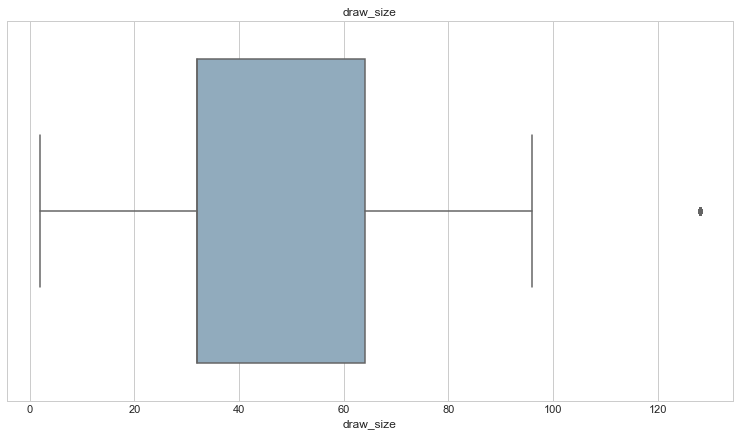

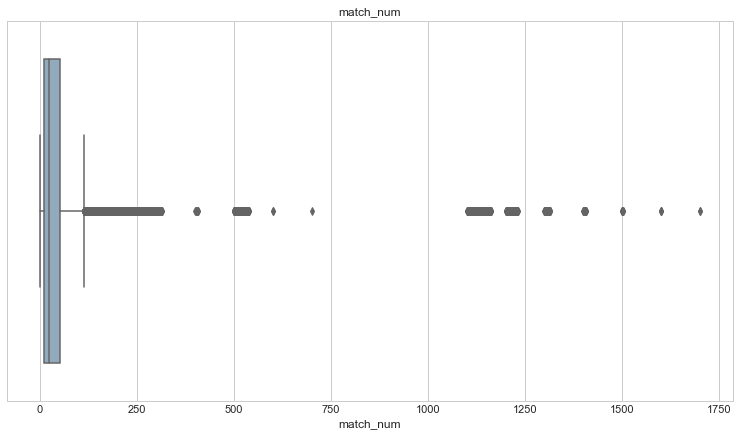

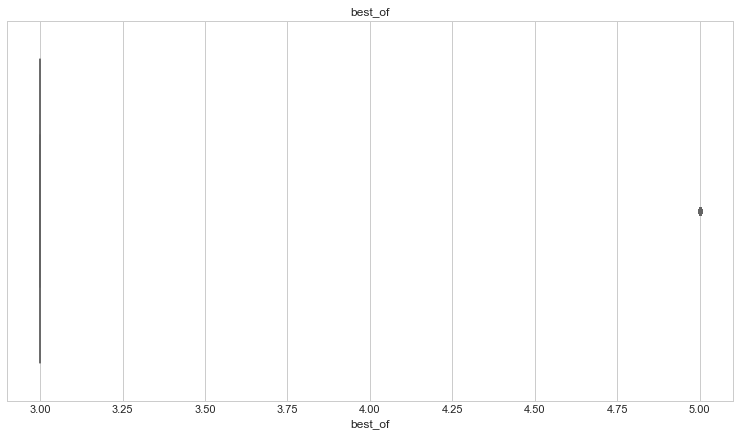

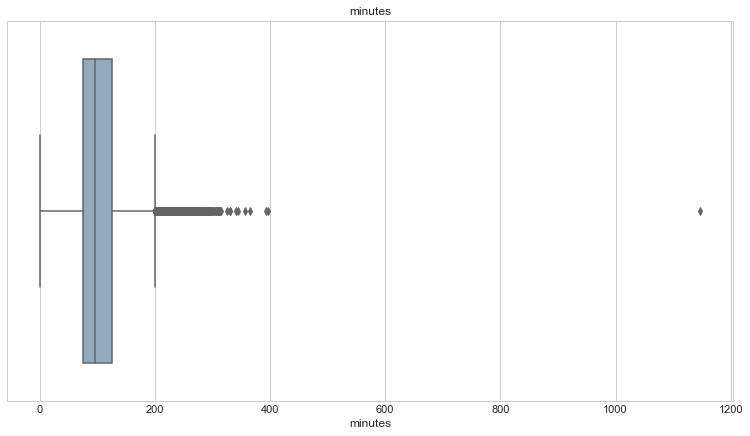

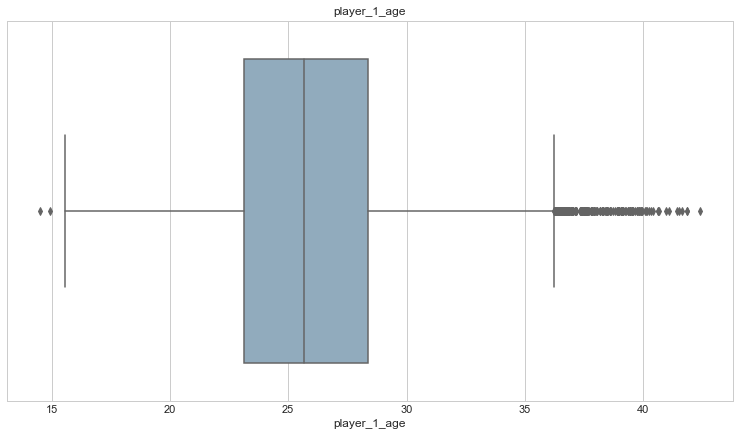

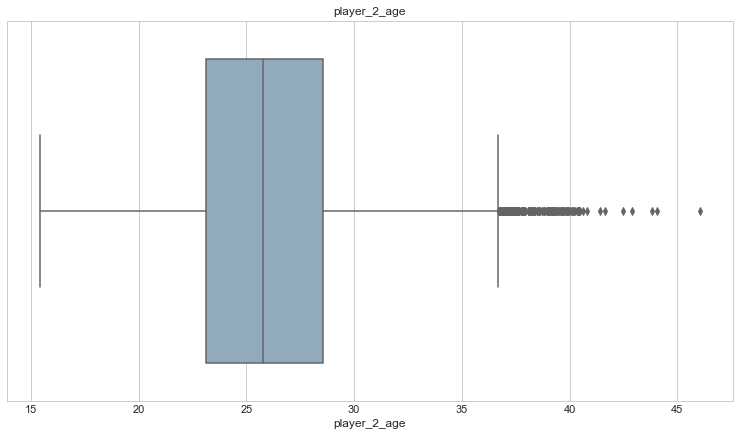

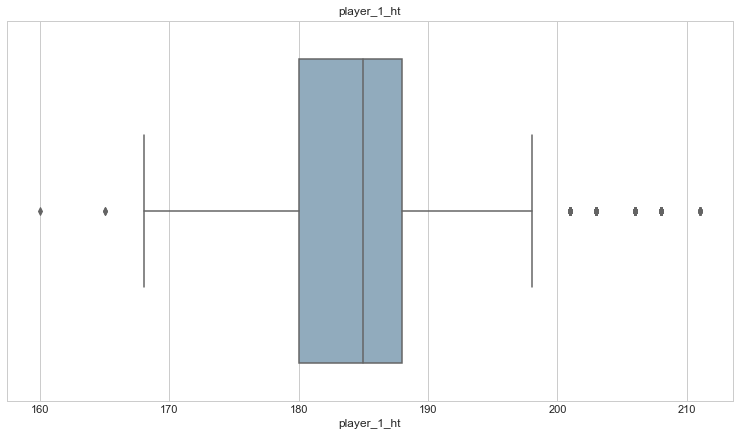

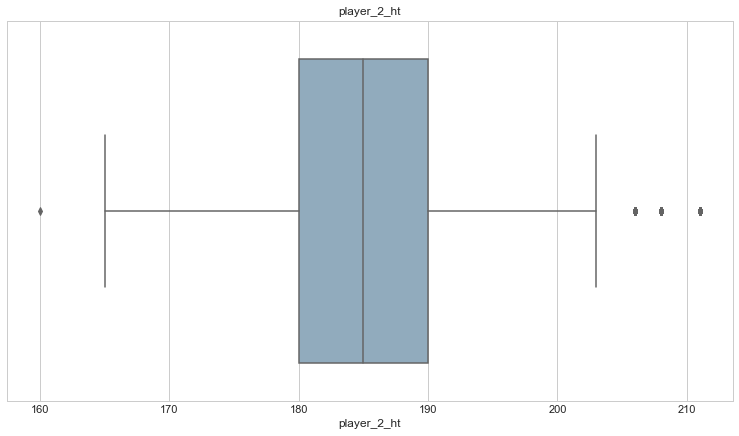

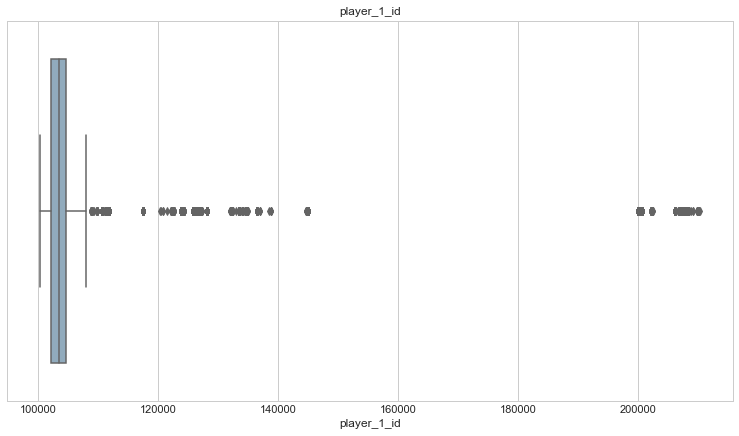

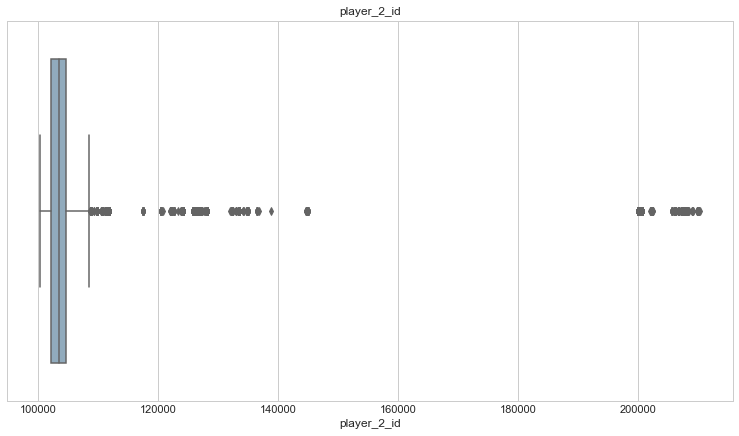

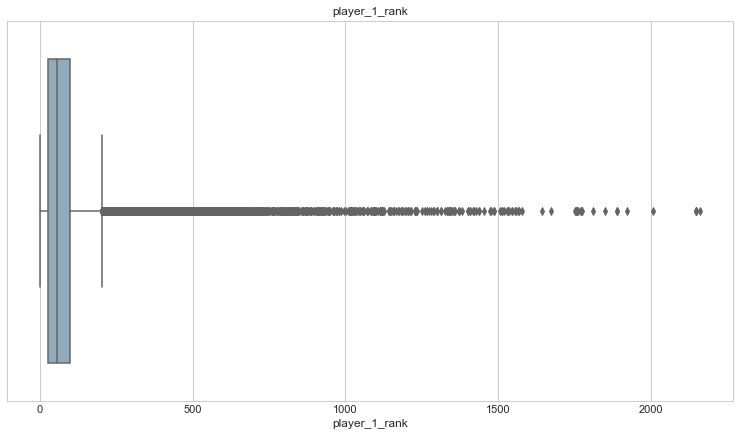

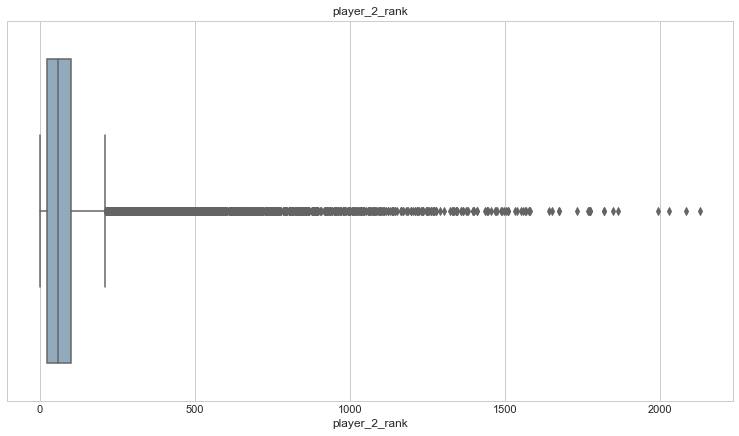

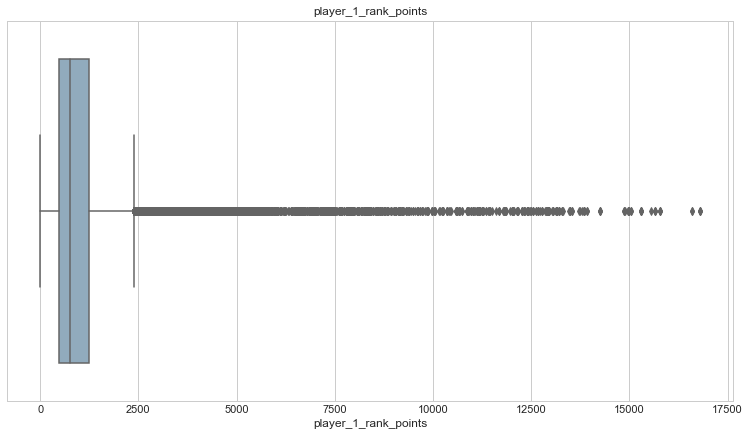

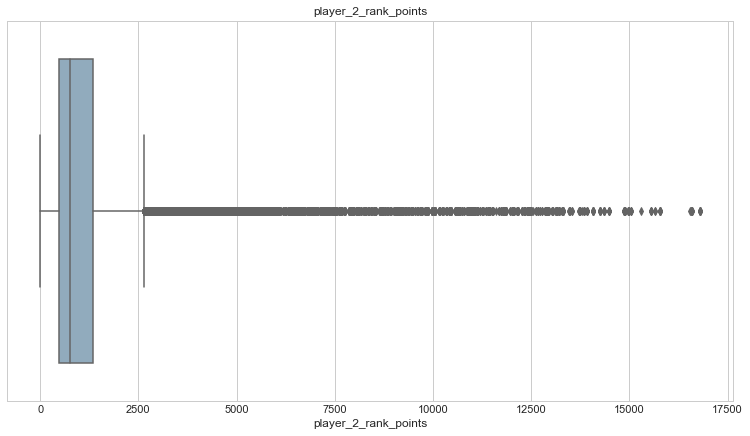

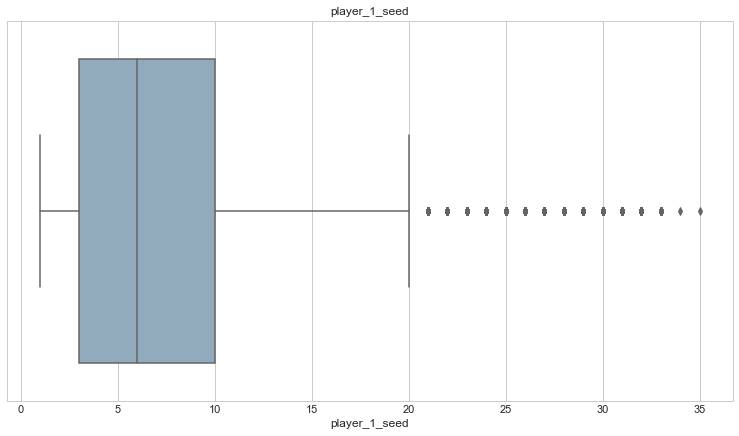

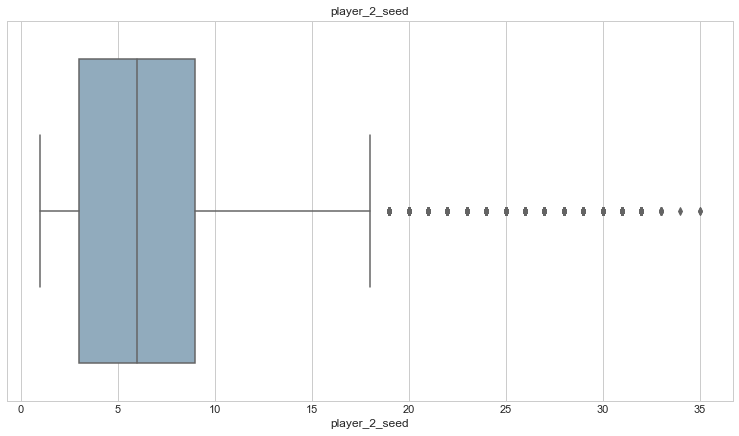

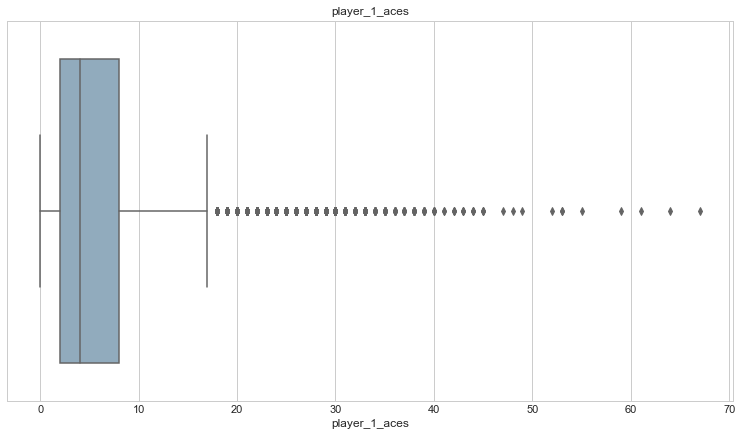

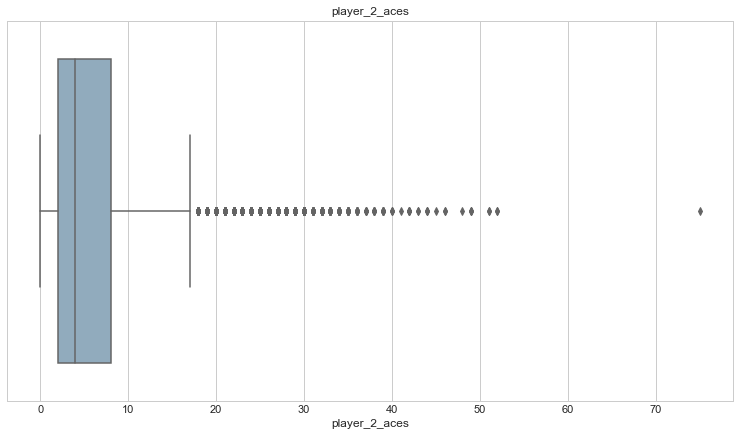

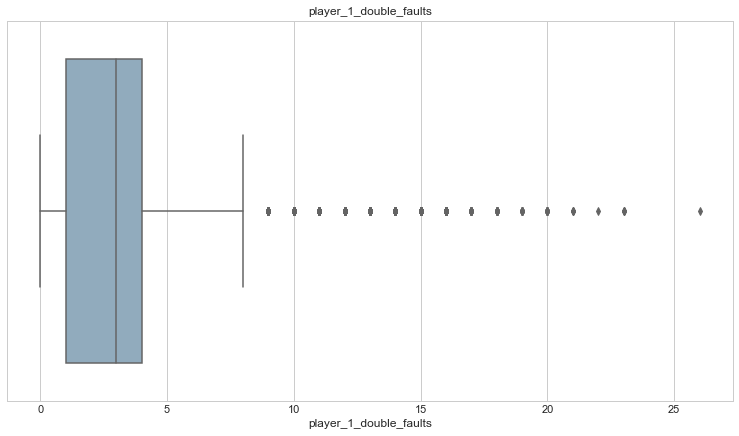

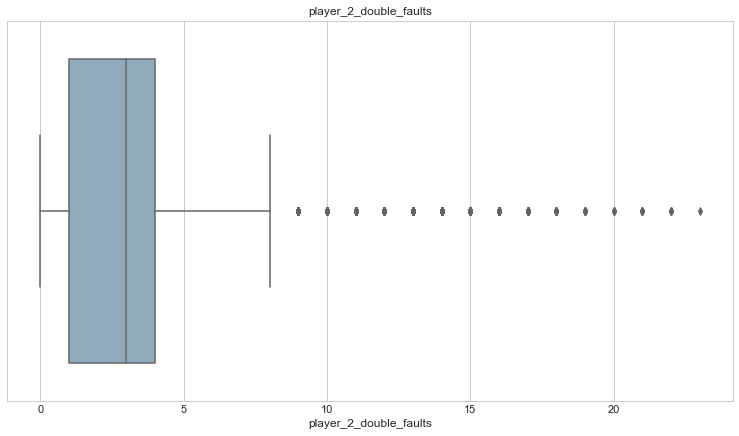

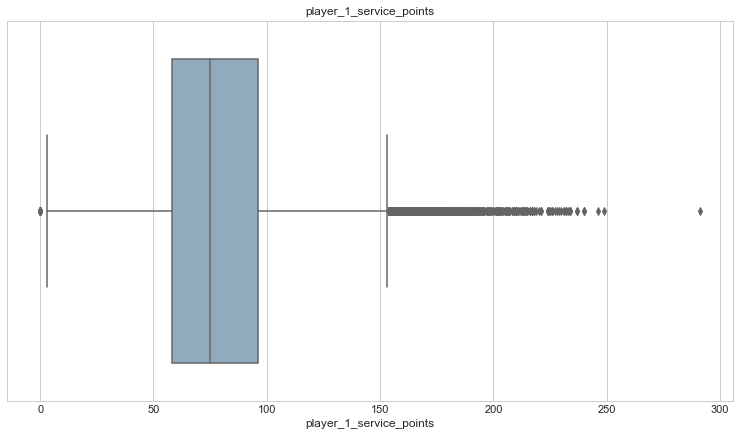

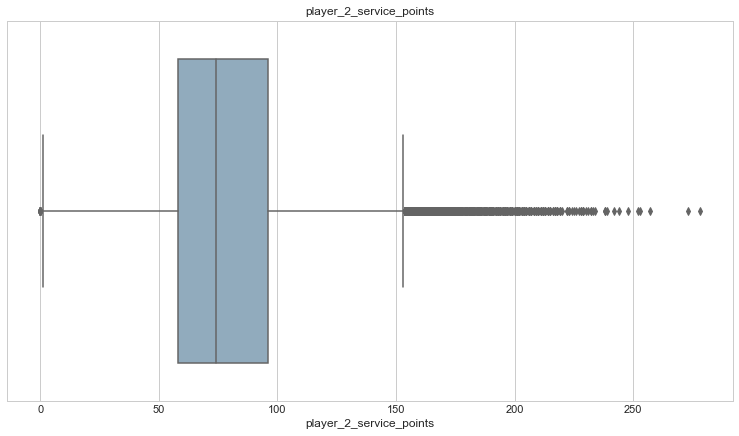

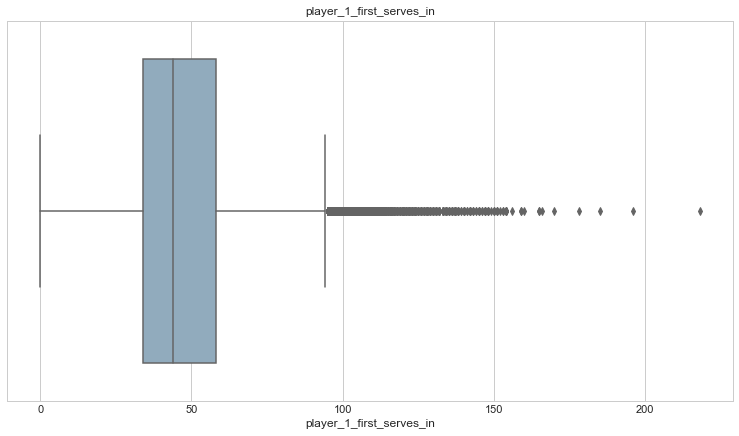

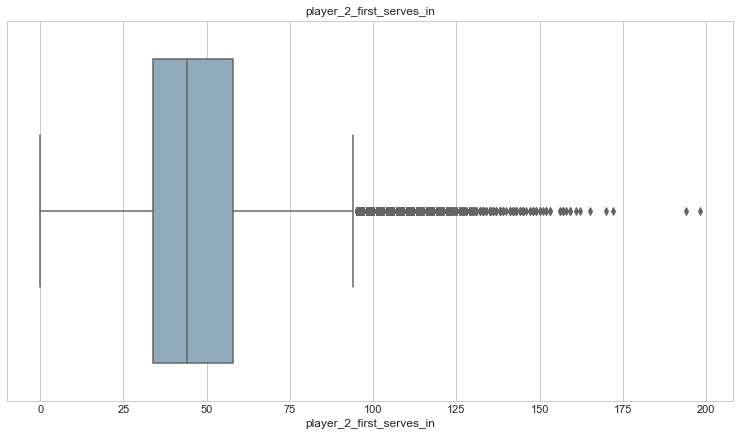

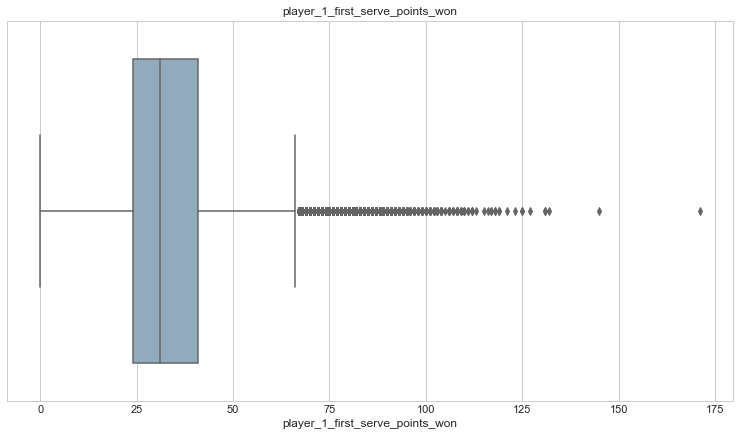

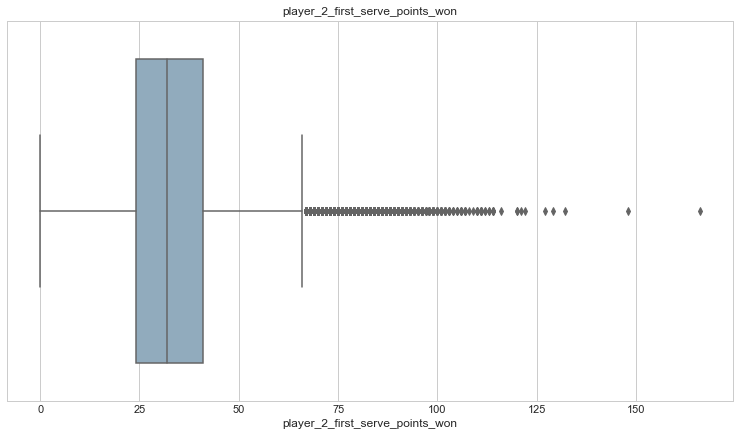

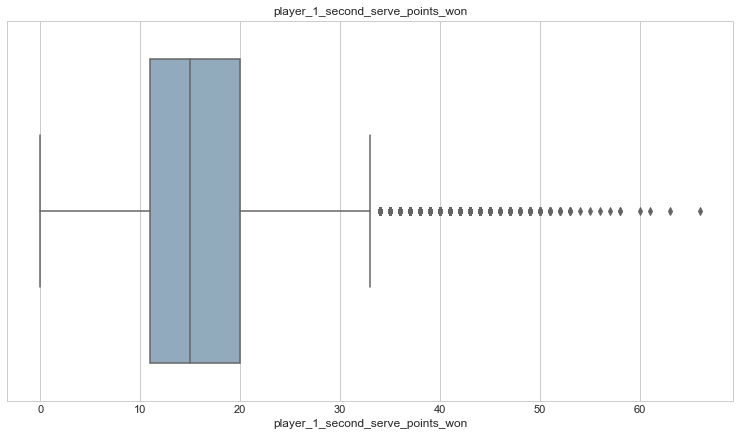

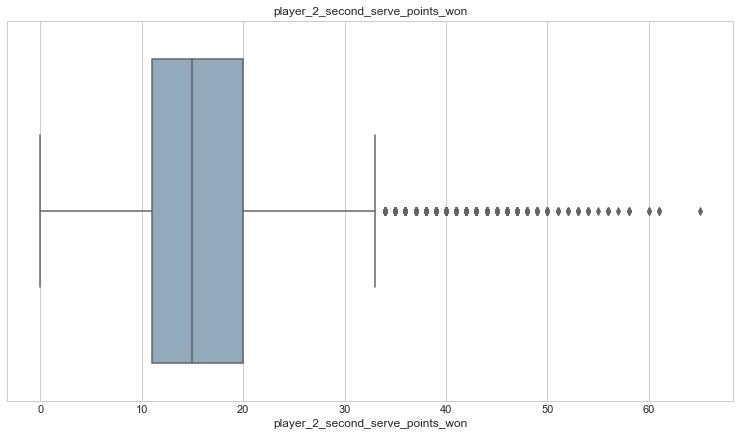

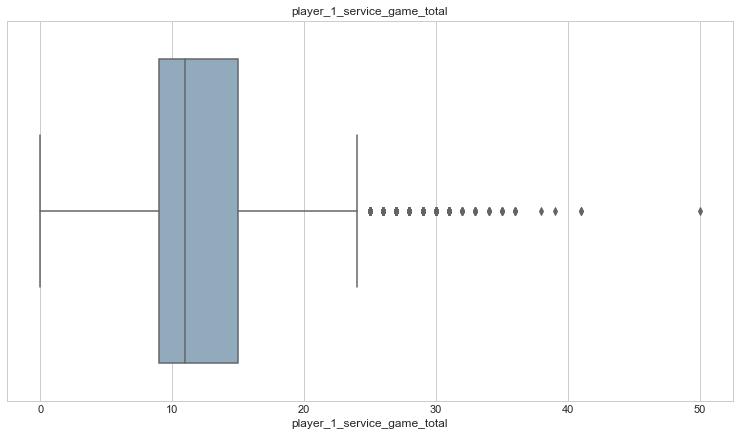

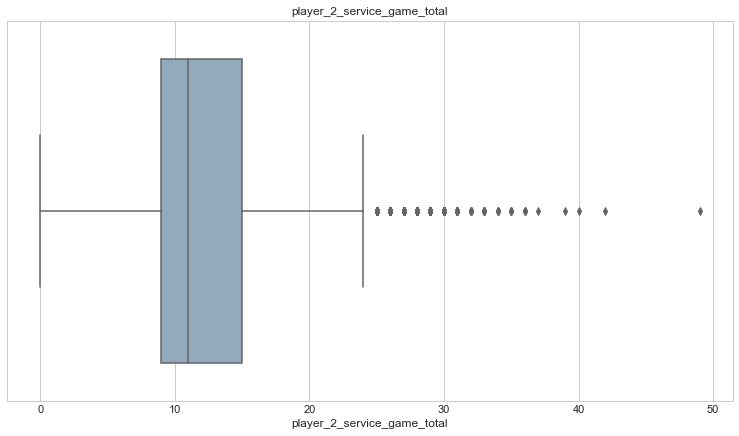

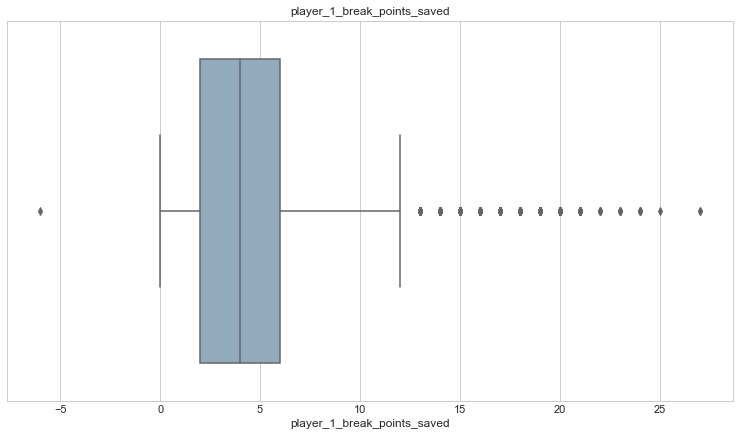

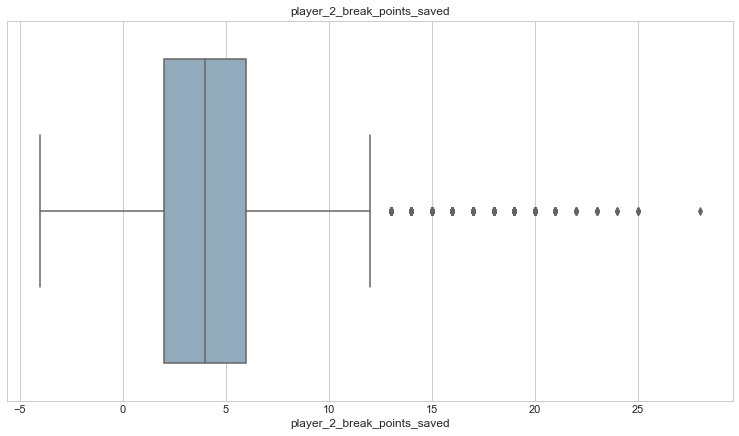

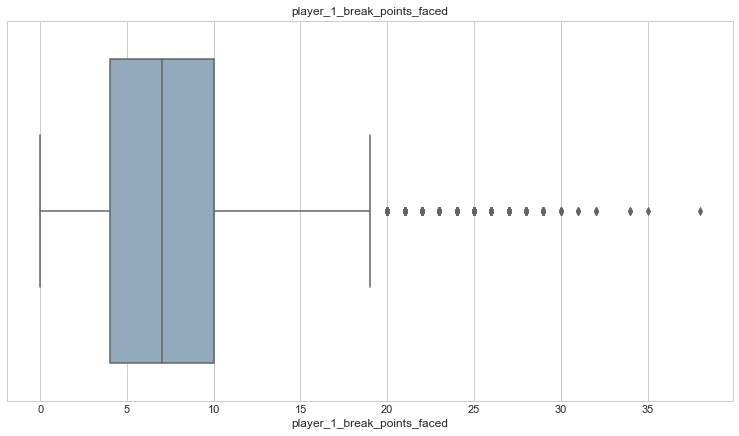

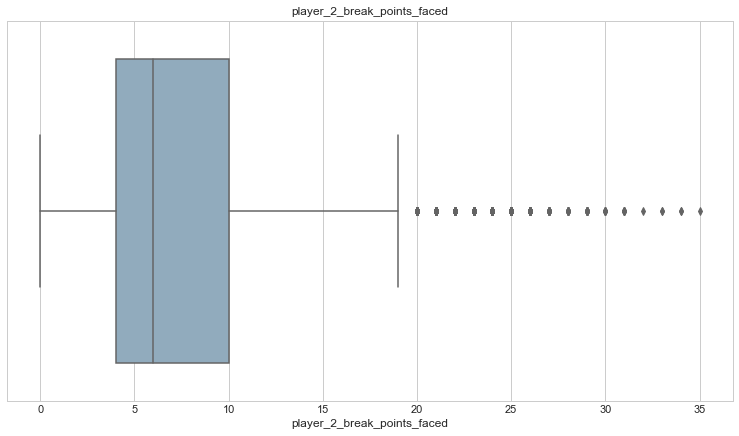

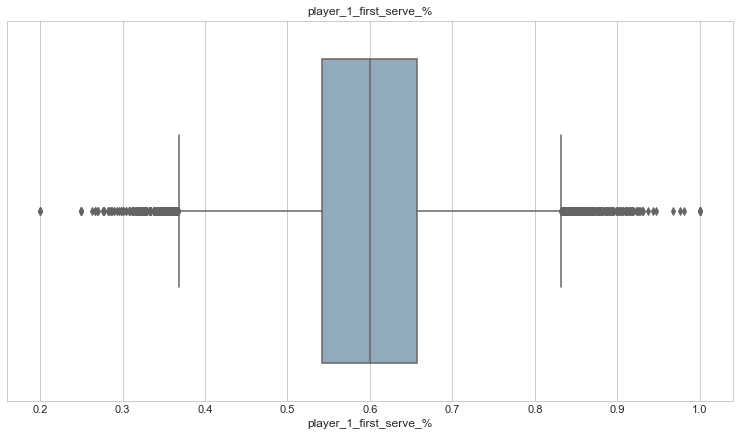

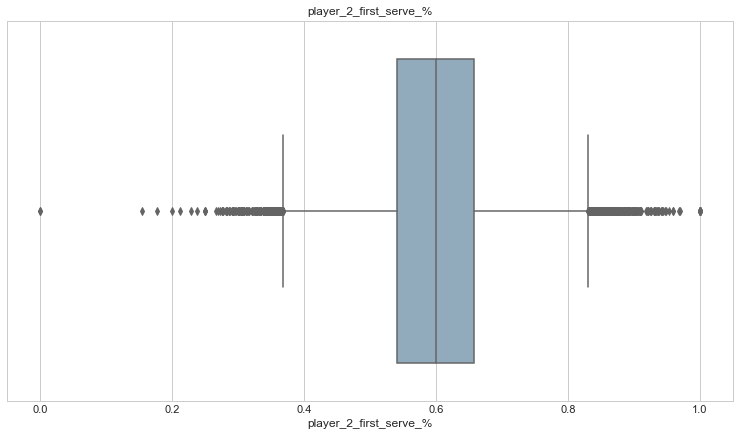

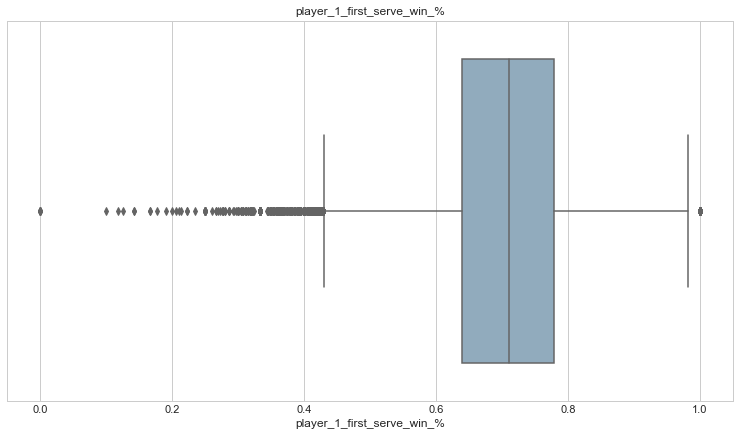

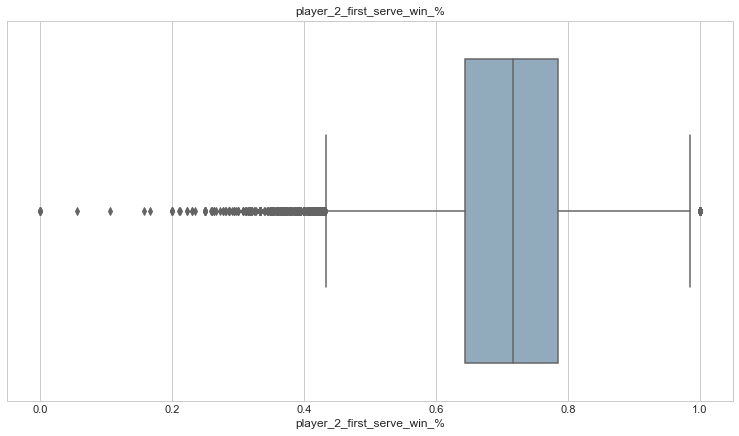

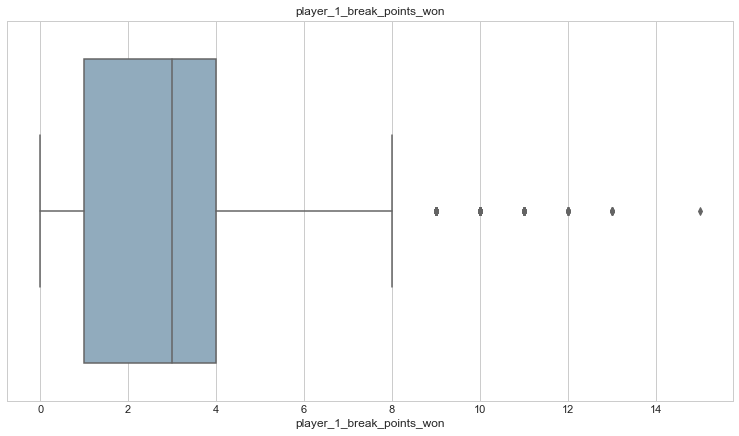

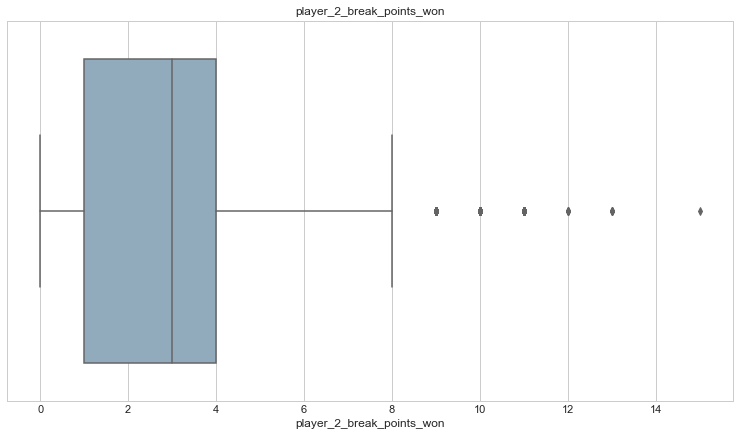

In [70]:
# visualize features for outliers
for col in df_numeric:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()
        


In [71]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
draw_size,65950.0,57.179136,36.988782,2.000000,32.000000,32.000000,64.000000,128.000000
match_num,65950.0,63.857089,112.918185,1.000000,12.000000,25.000000,53.000000,1701.000000
best_of,65950.0,3.378226,0.783203,3.000000,3.000000,3.000000,3.000000,5.000000
minutes,63794.0,103.625952,39.455069,1.000000,75.000000,96.000000,125.000000,1146.000000
player_1_age,65941.0,25.885818,3.719449,14.513347,23.134839,25.681040,28.377823,42.387406
player_2_age,65941.0,25.986991,3.805327,15.430527,23.140315,25.776865,28.566735,46.036961
player_1_ht,64341.0,185.091901,6.599333,160.000000,180.000000,185.000000,188.000000,211.000000
player_2_ht,64396.0,185.747919,6.640177,160.000000,180.000000,185.000000,190.000000,211.000000
player_1_id,65950.0,104874.778893,10690.149482,100284.000000,102035.000000,103344.000000,104593.000000,210250.000000
player_2_id,65950.0,104811.533829,10491.602808,100282.000000,102021.000000,103428.000000,104607.000000,210274.000000


In [81]:
# creat a list of ranks and make them a numpay array 
rank_list = df.player_1_rank.unique()

In [82]:
rank_list

nan

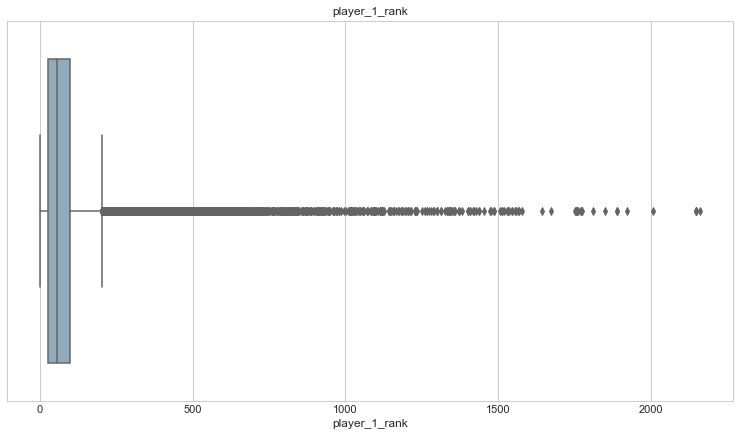

In [86]:
#Barplot rankings to understad the data and the players in it by ranking 
sns.boxplot(df['player_1_rank'])
plt.title('player_1_rank')
plt.show()

In [87]:
df.player_1_rank.describe()

count    65732.000000
mean        82.024143
std        112.047604
min          1.000000
25%         27.000000
50%         56.000000
75%         97.000000
max       2159.000000
Name: player_1_rank, dtype: float64

- We can use the top 250 ranked players to create a frame of players that have consistent data. Rank above 250 seem to be outliers meaning that they are not precent enogh in our data.
- after 36-37 years of age, tennis players start to become outliers in competition

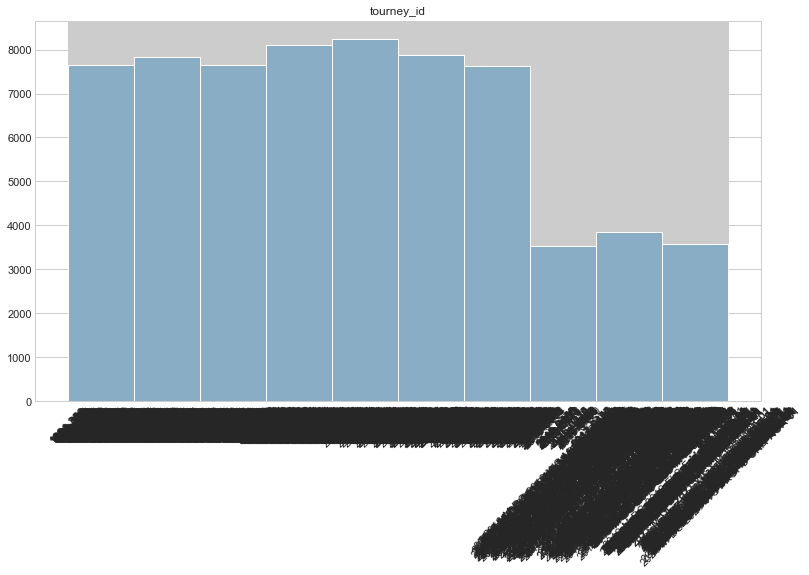

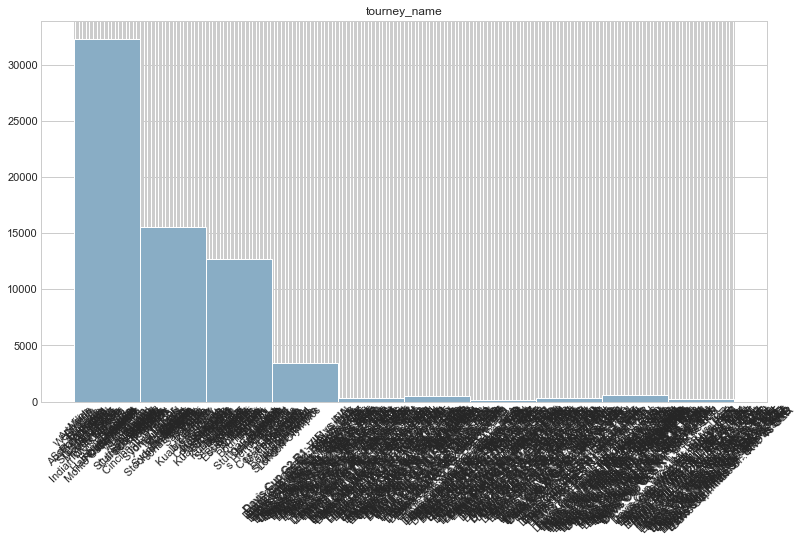

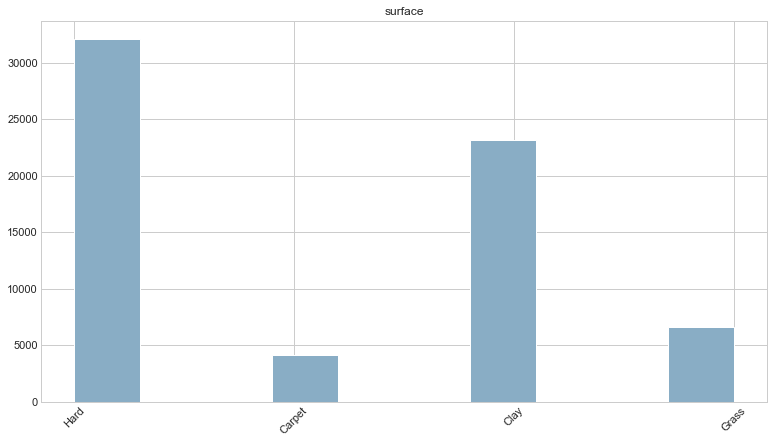

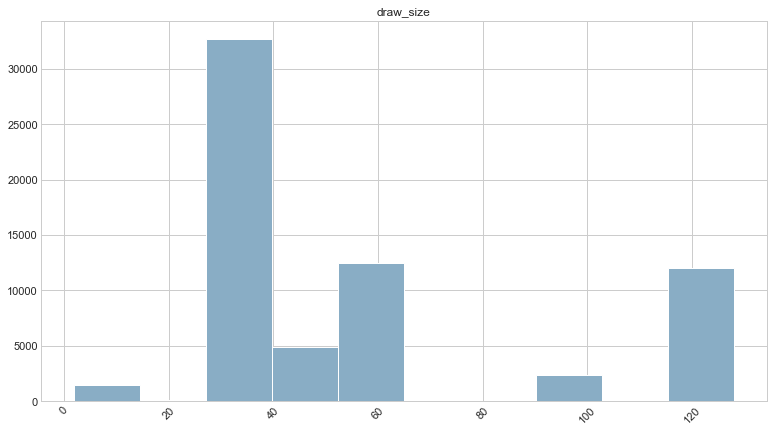

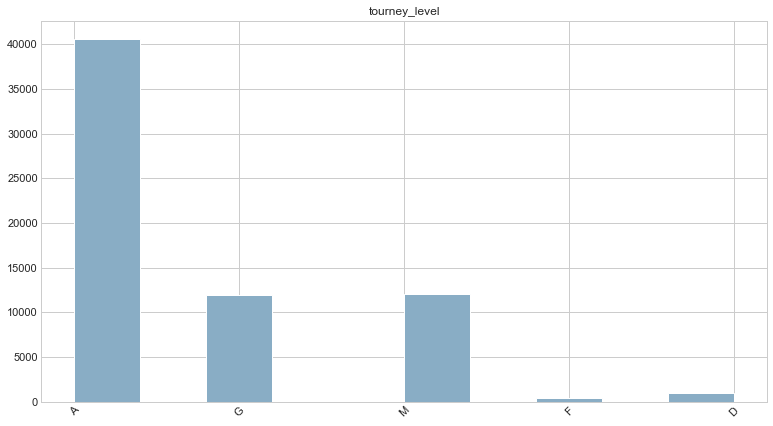

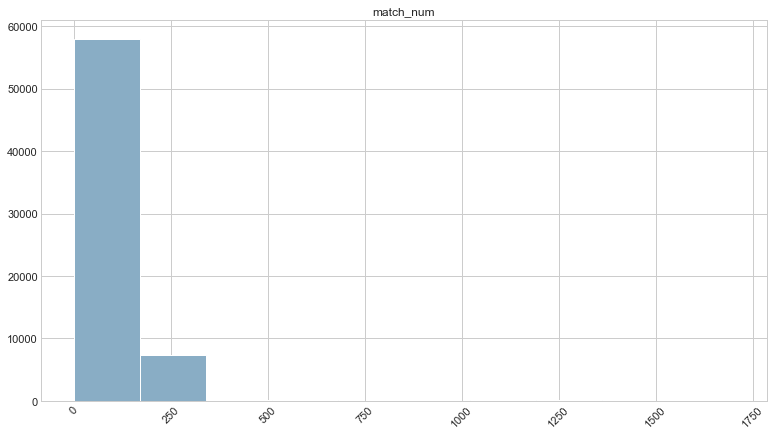

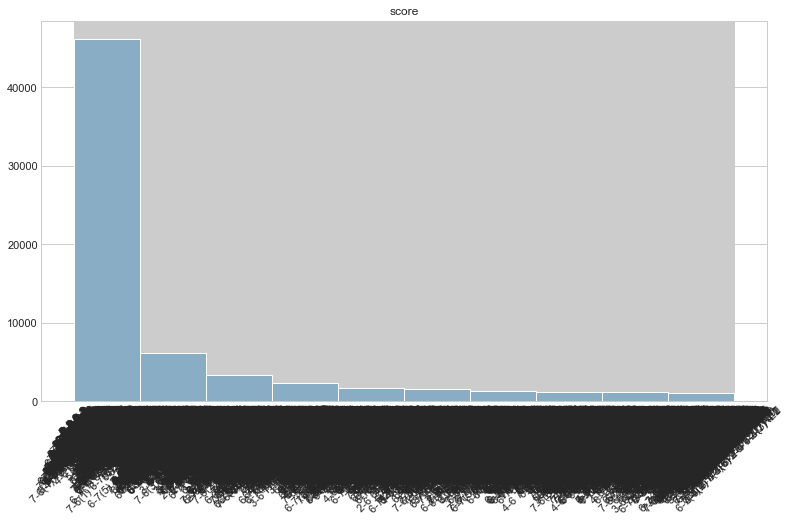

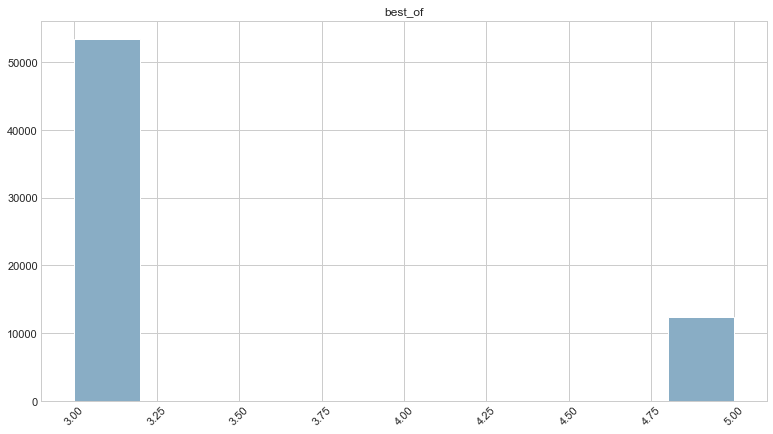

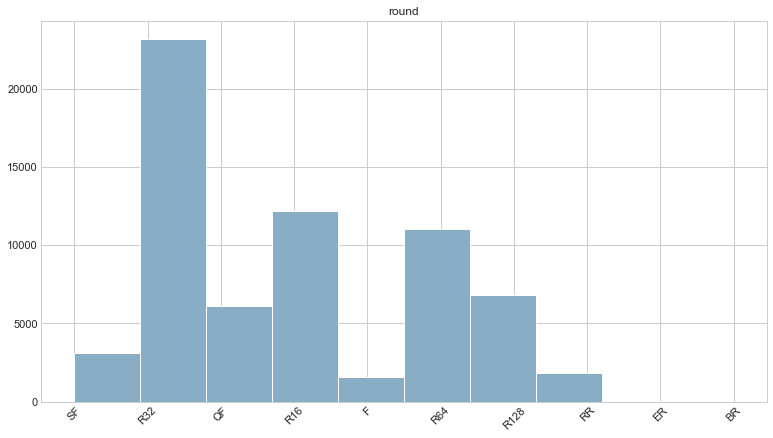

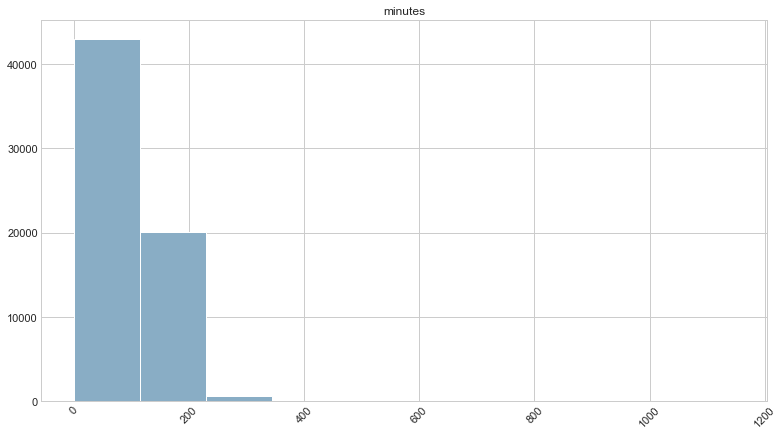

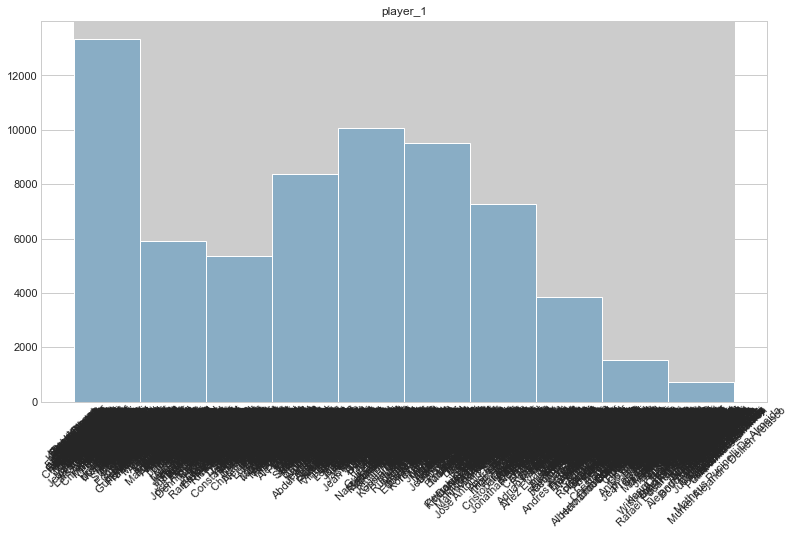

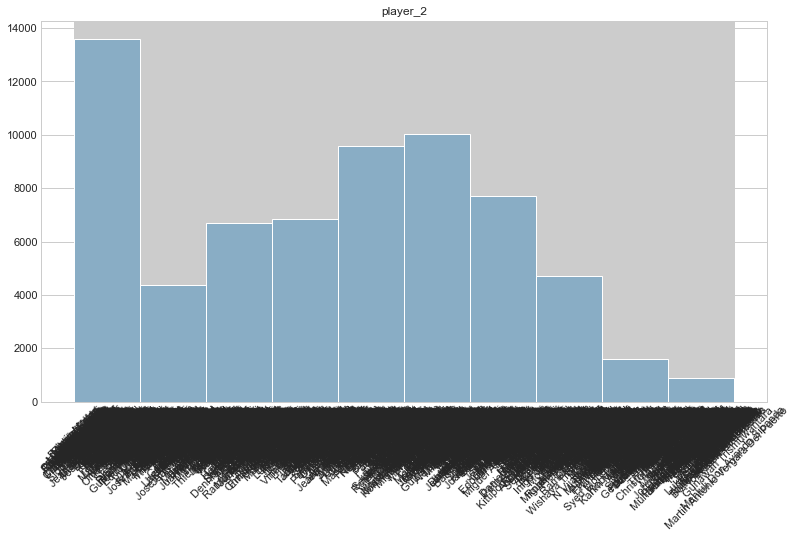

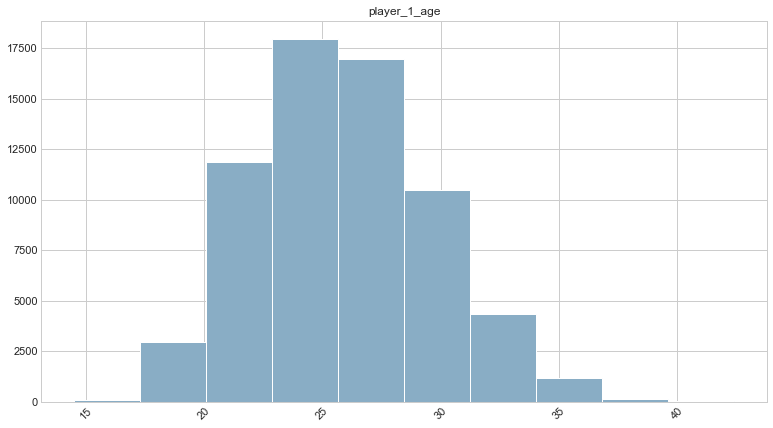

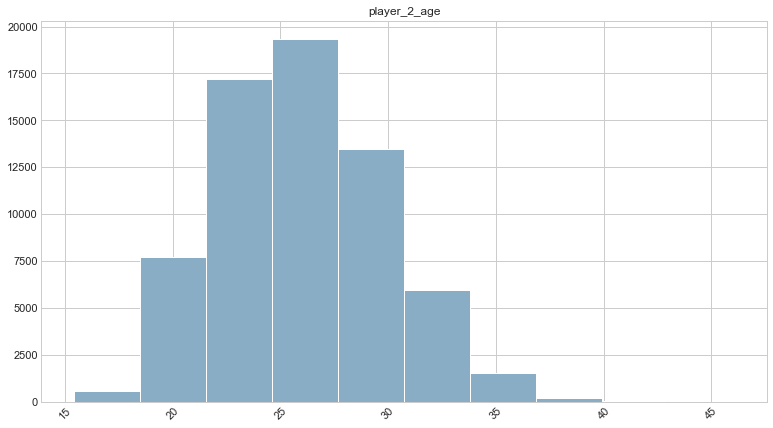

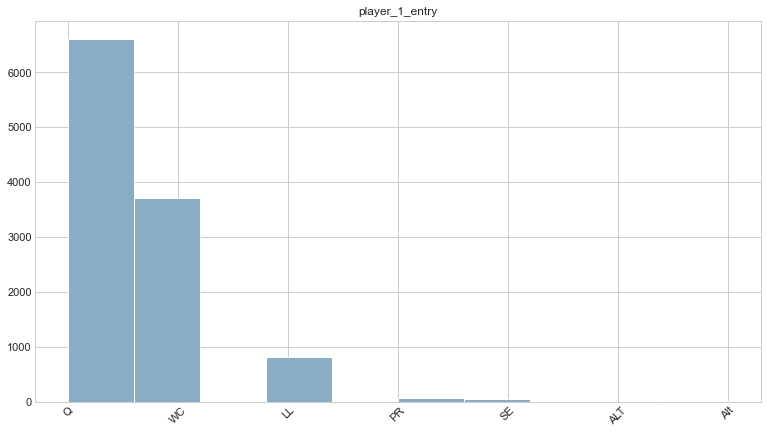

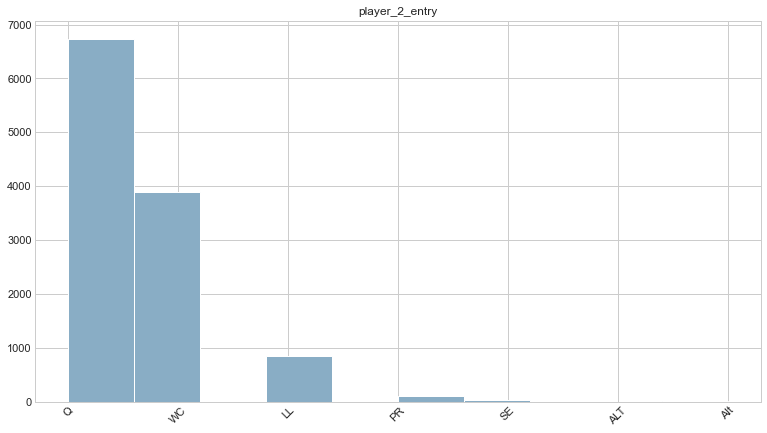

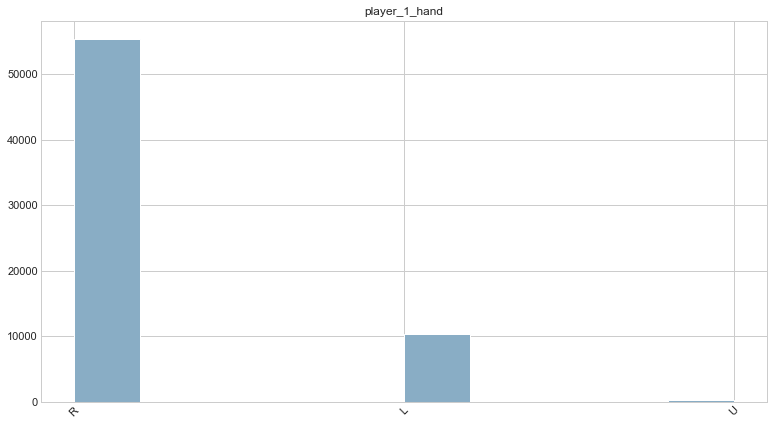

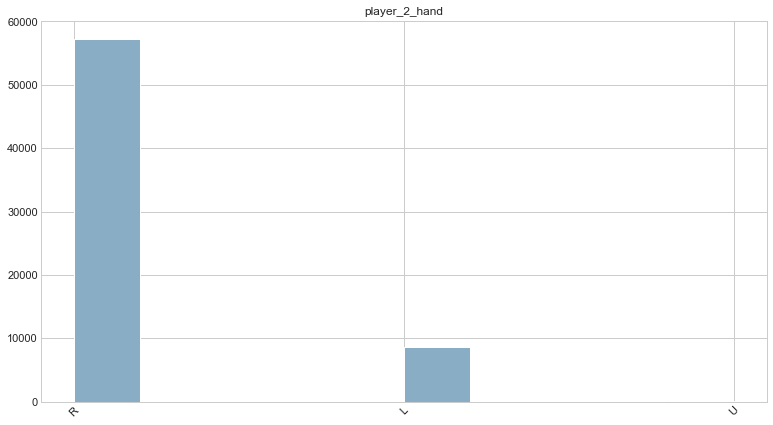

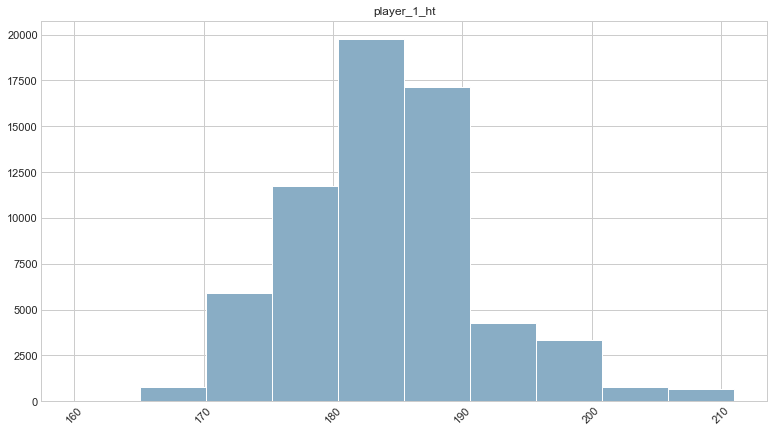

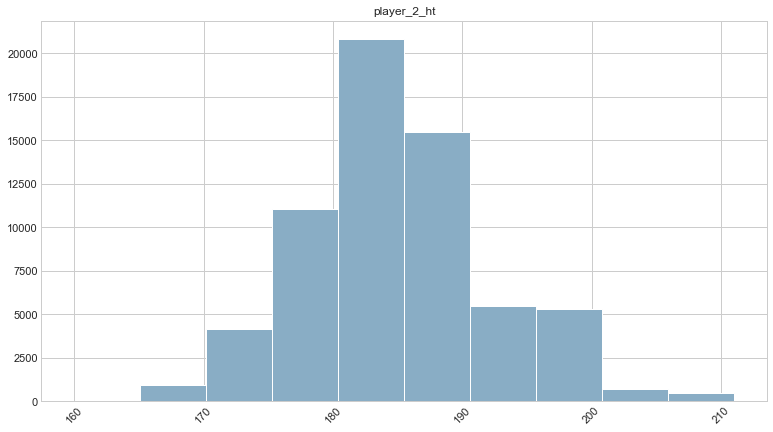

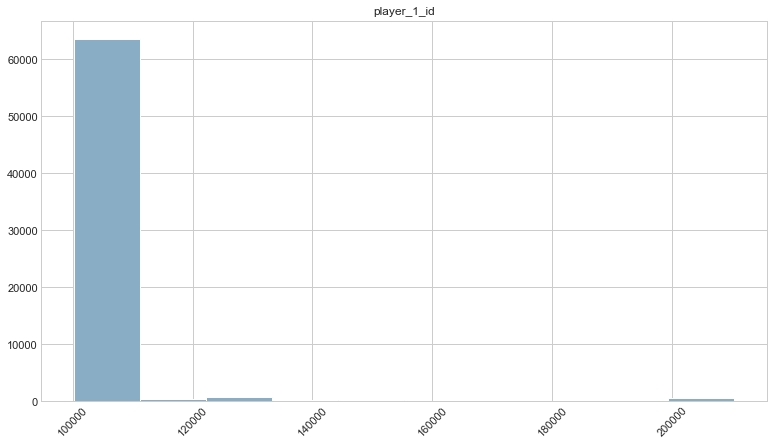

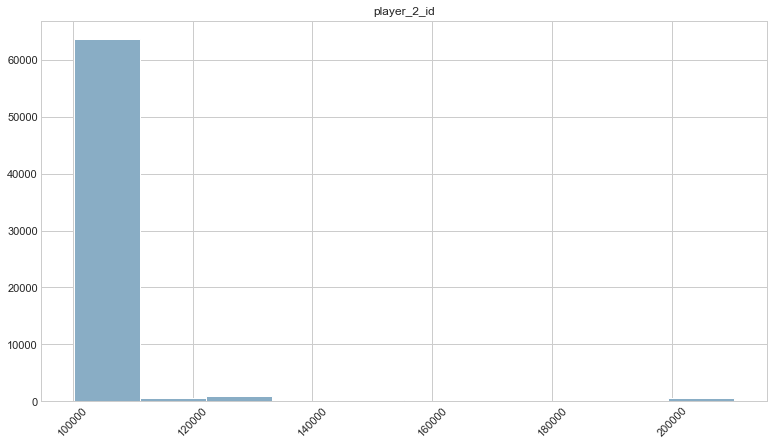

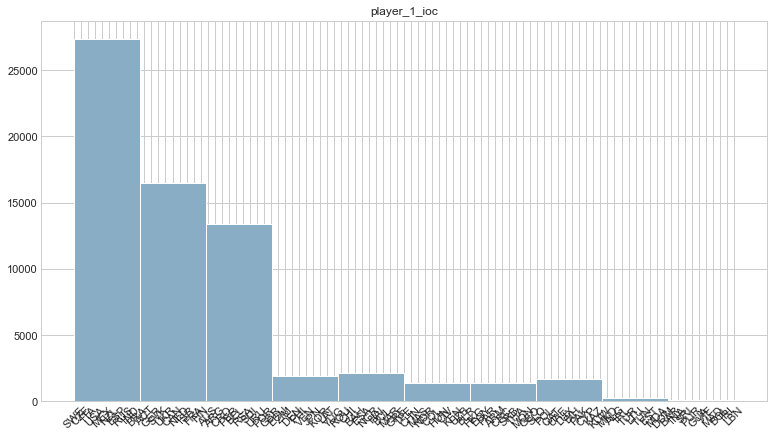

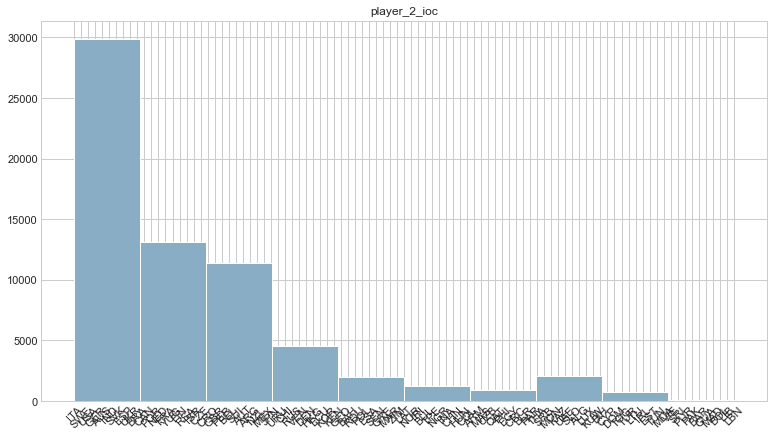

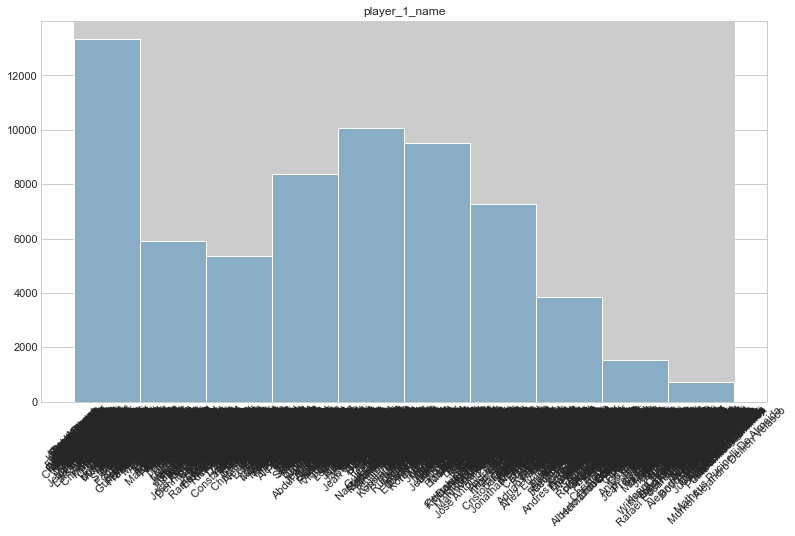

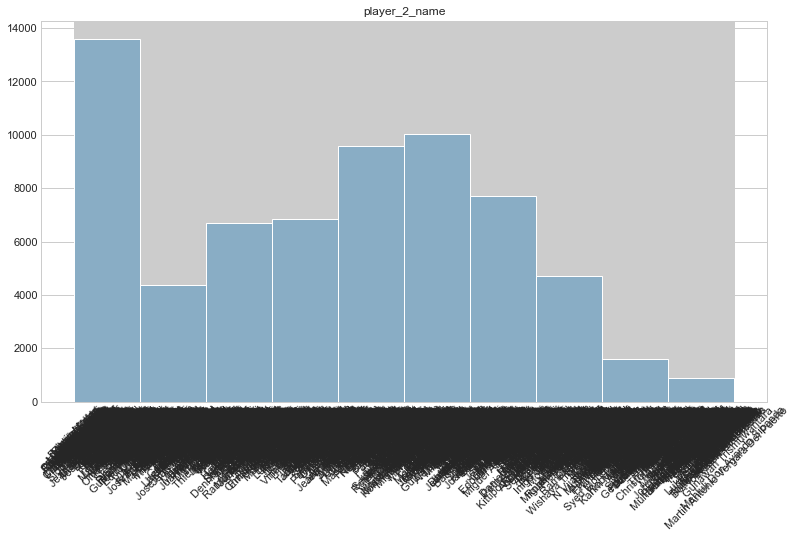

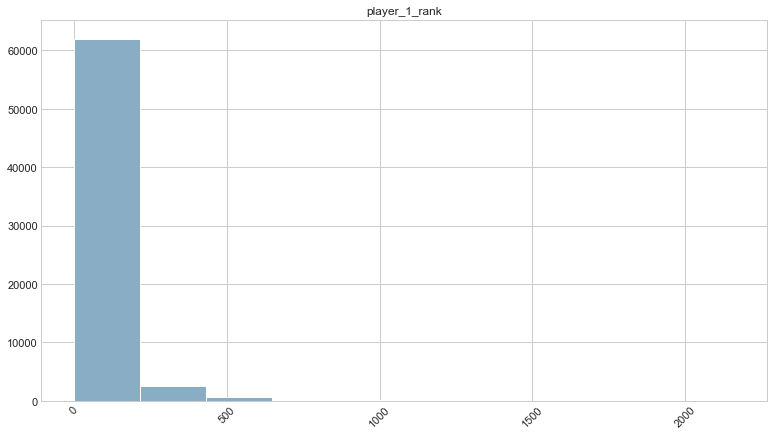

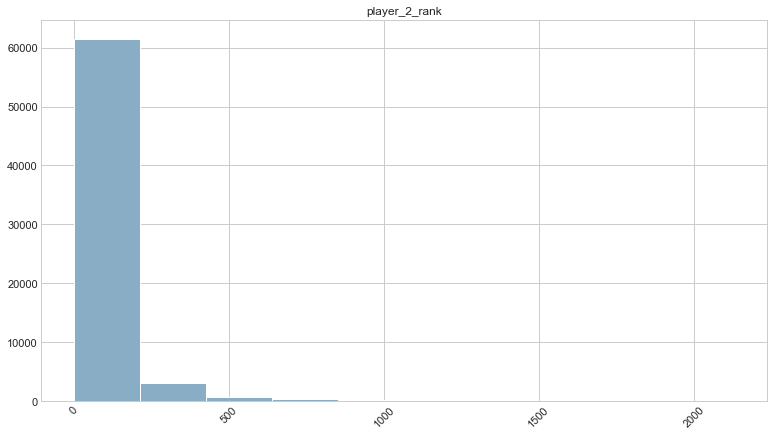

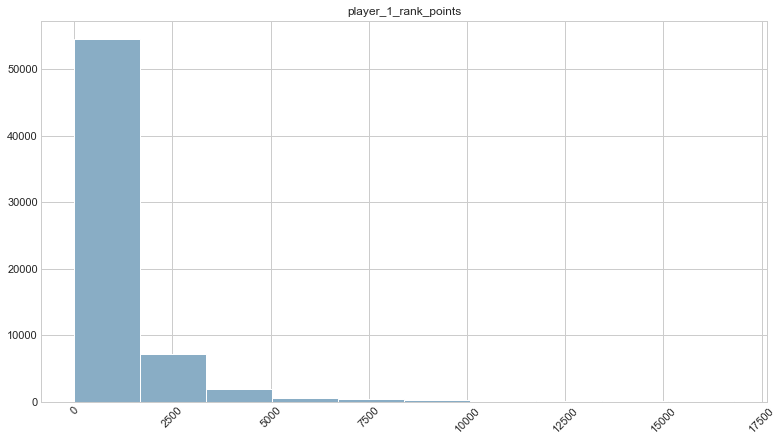

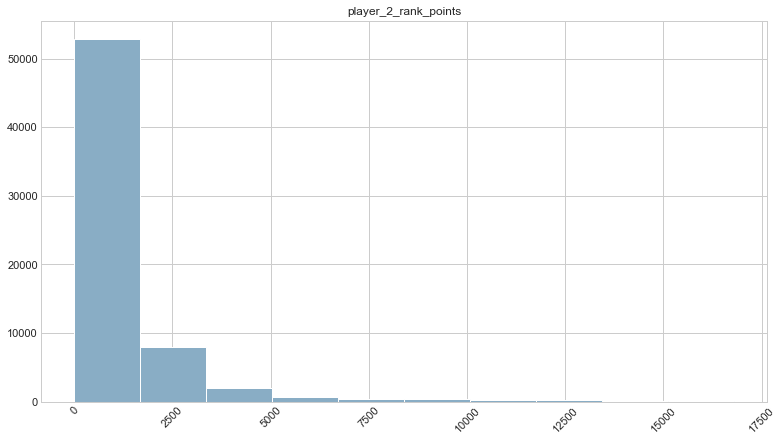

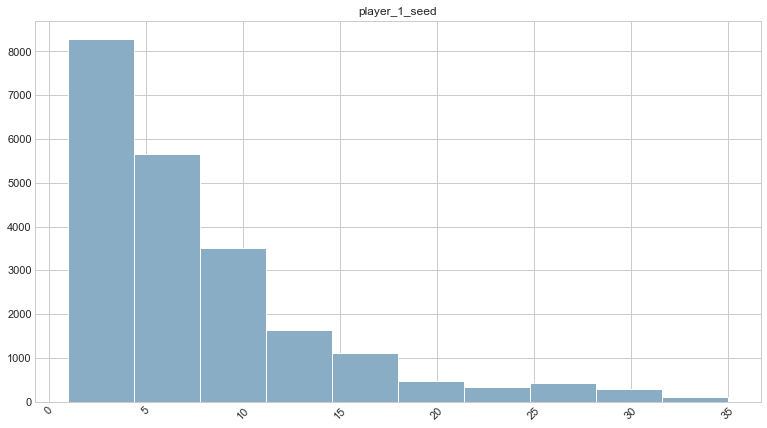

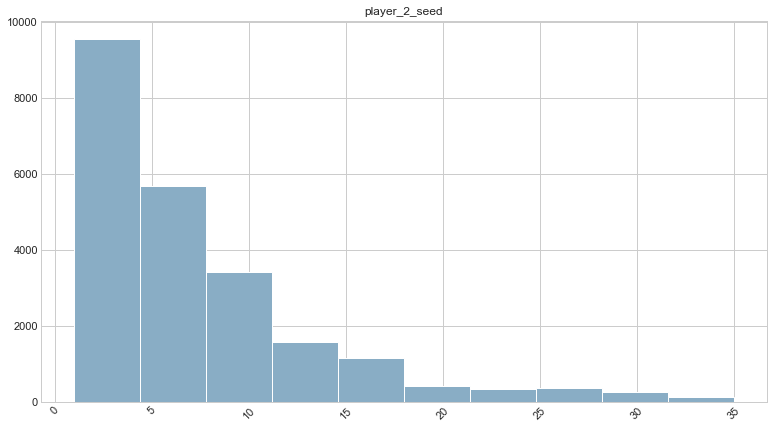

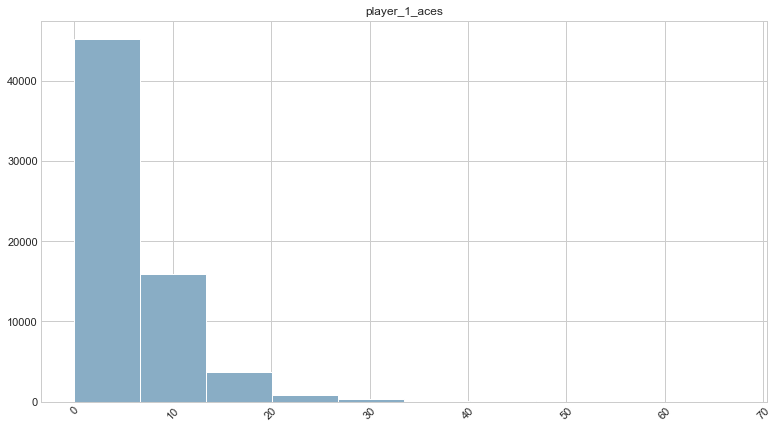

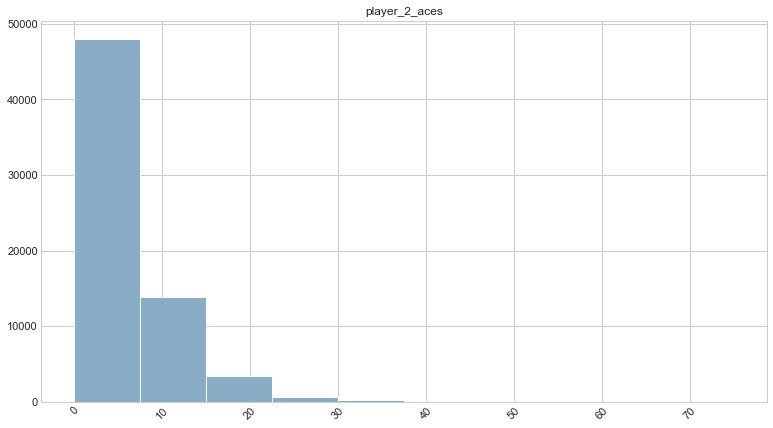

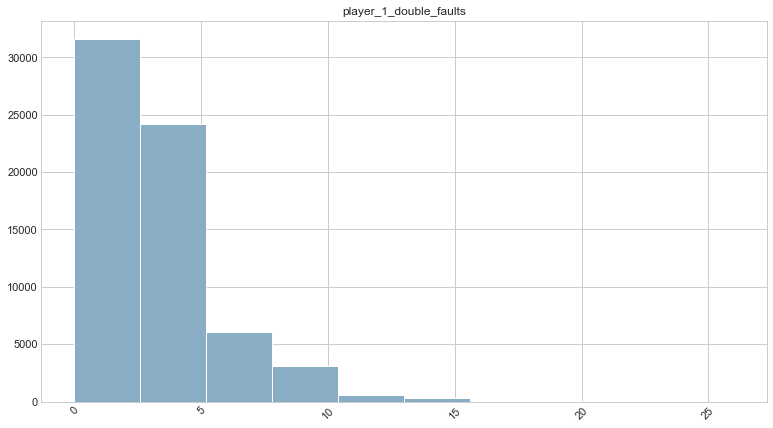

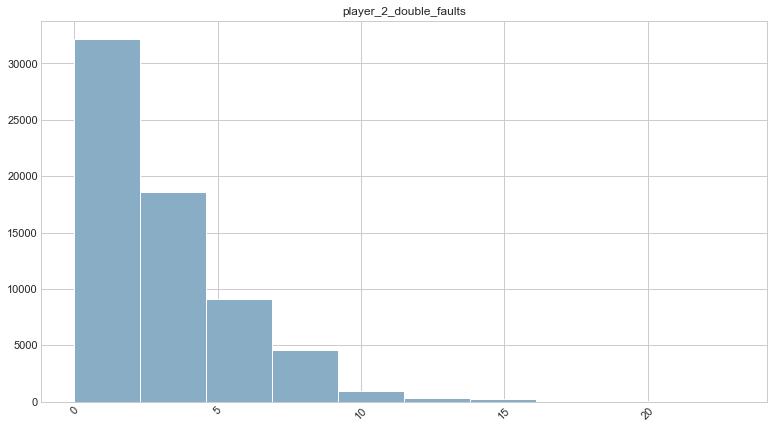

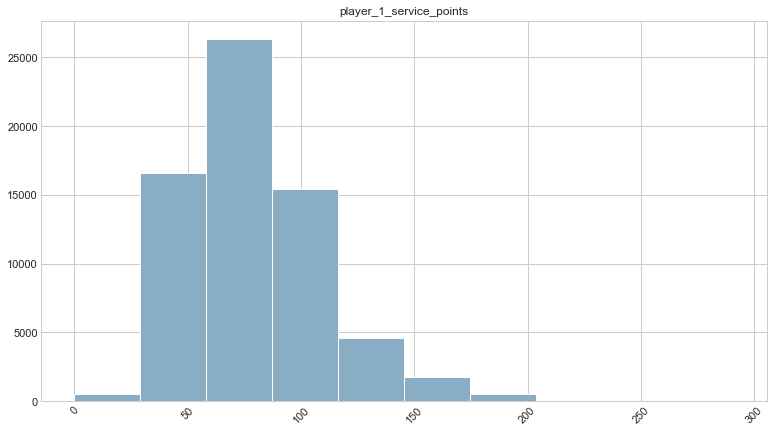

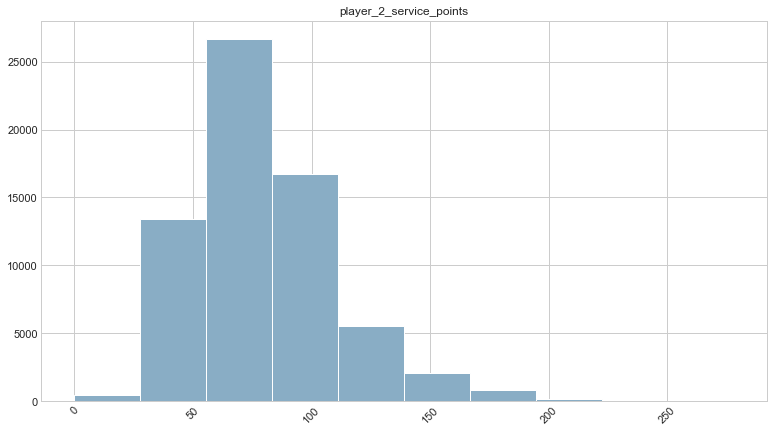

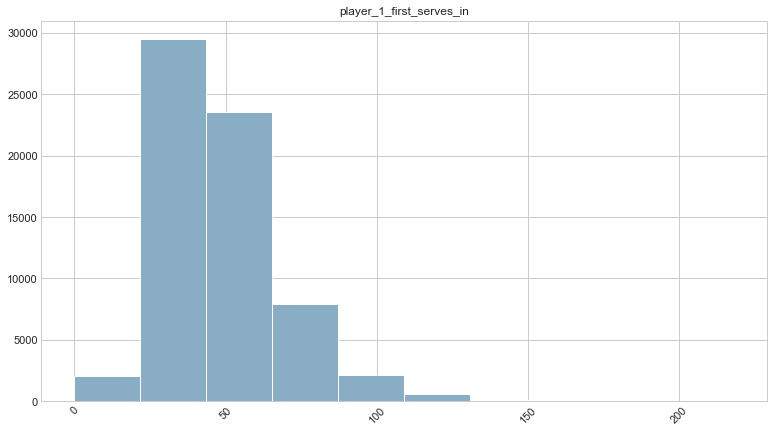

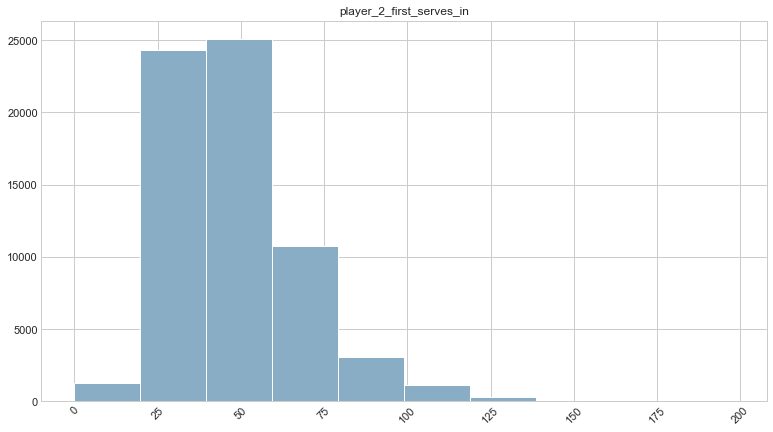

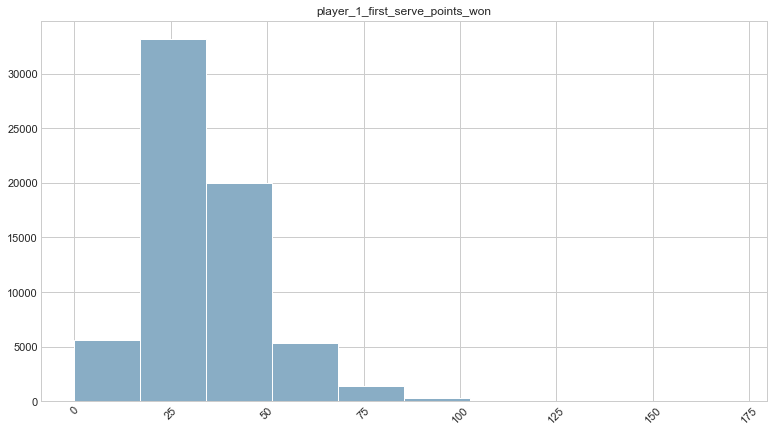

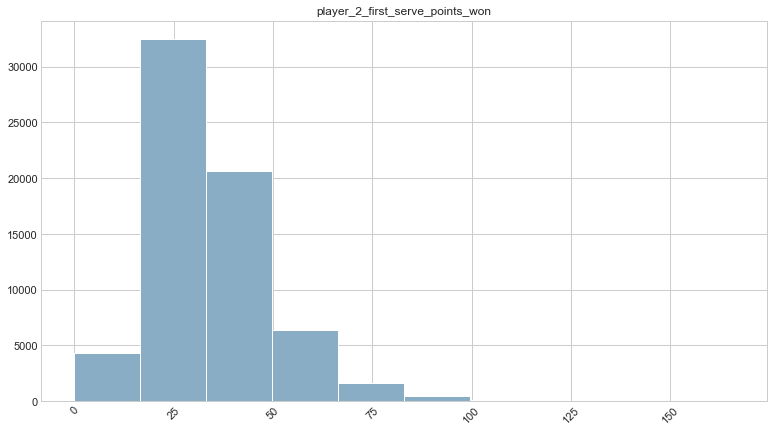

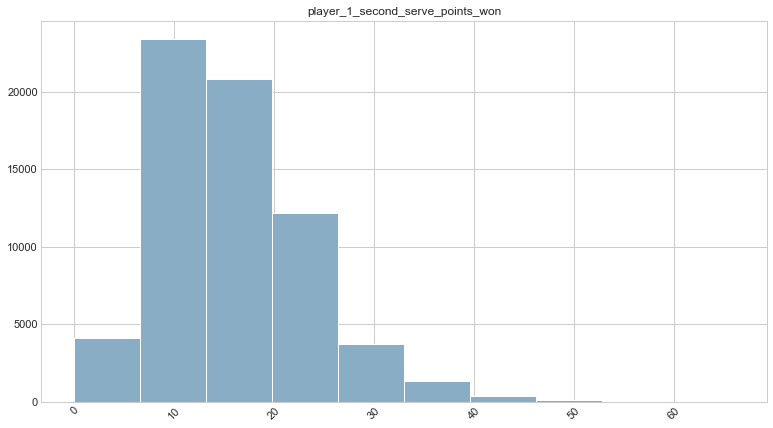

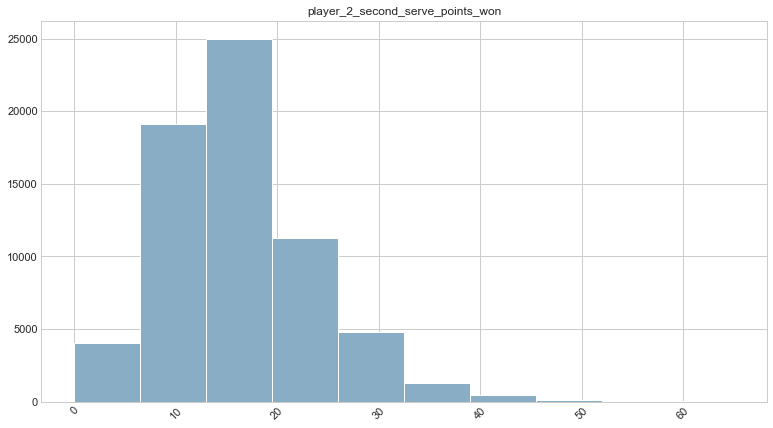

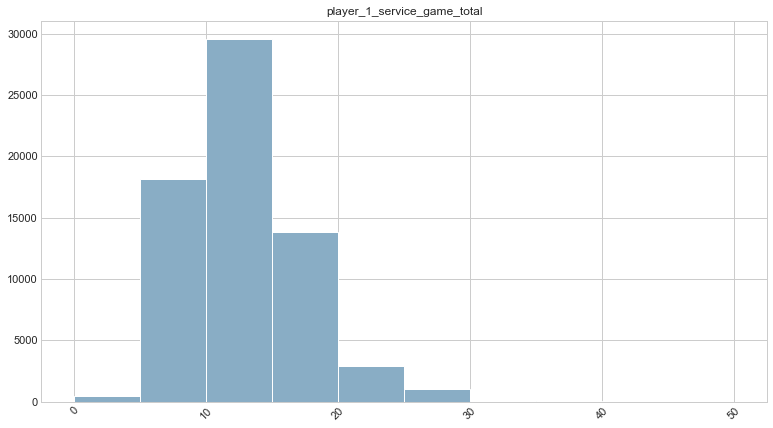

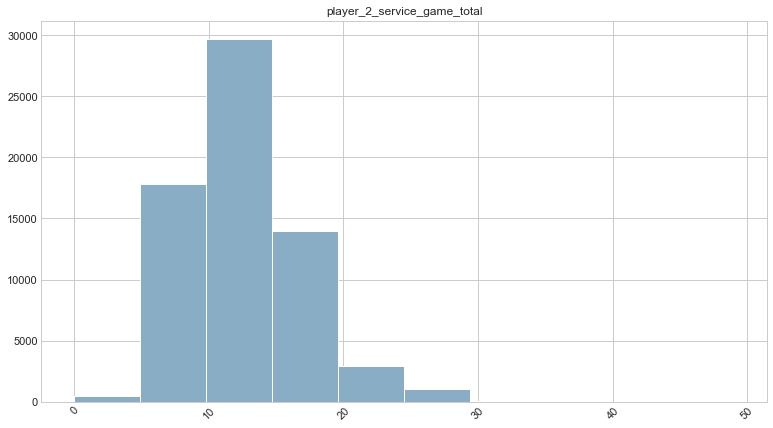

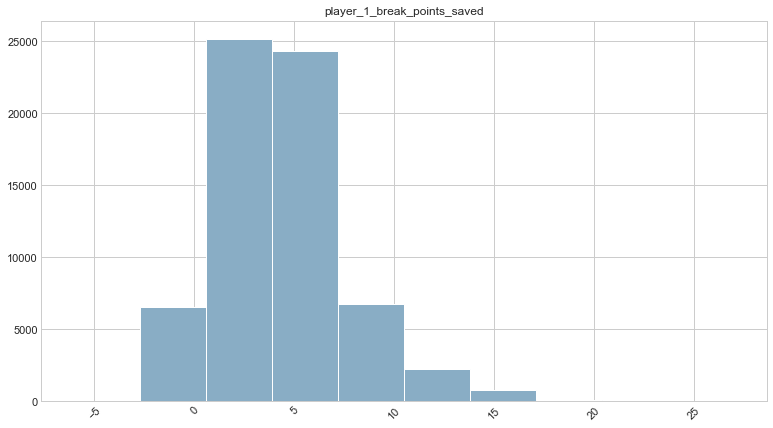

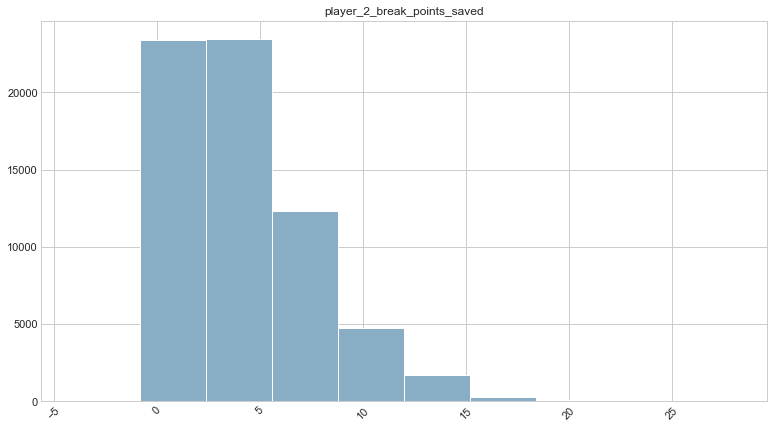

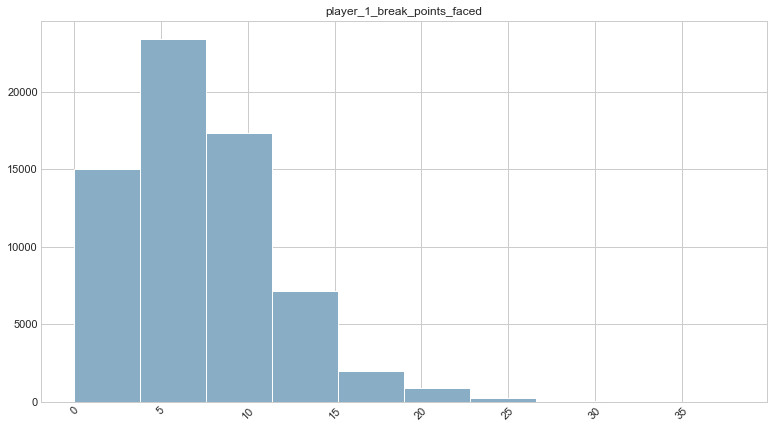

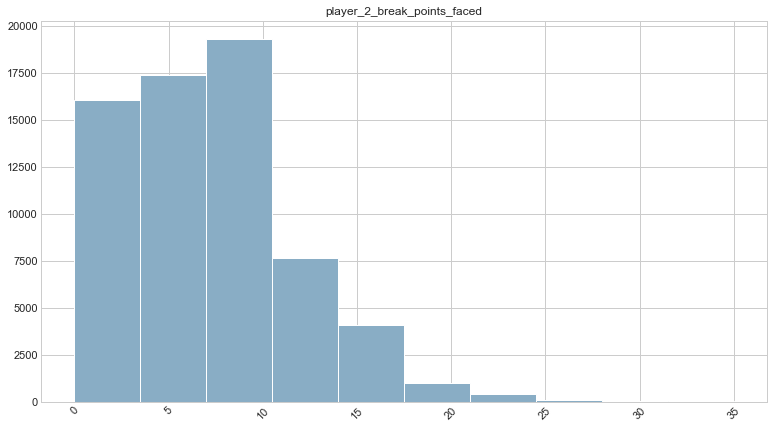

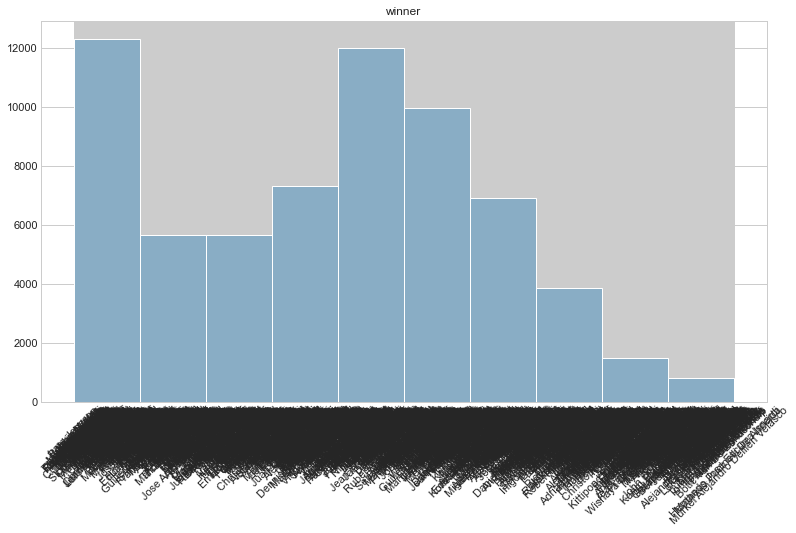

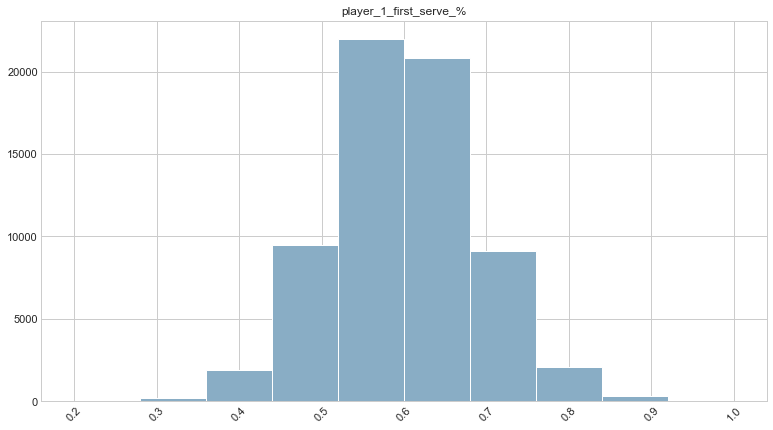

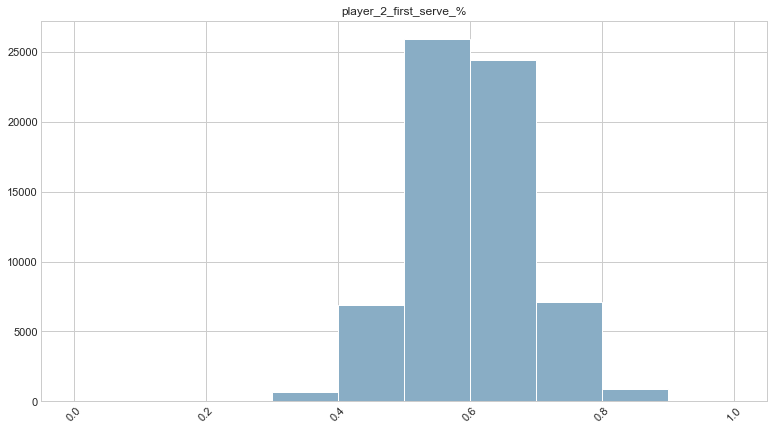

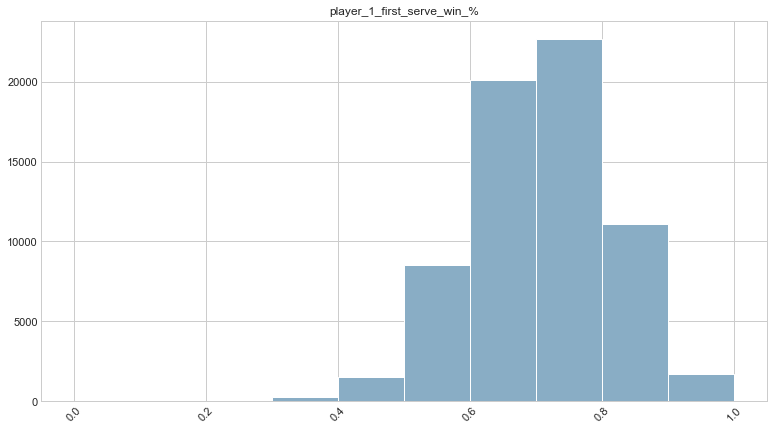

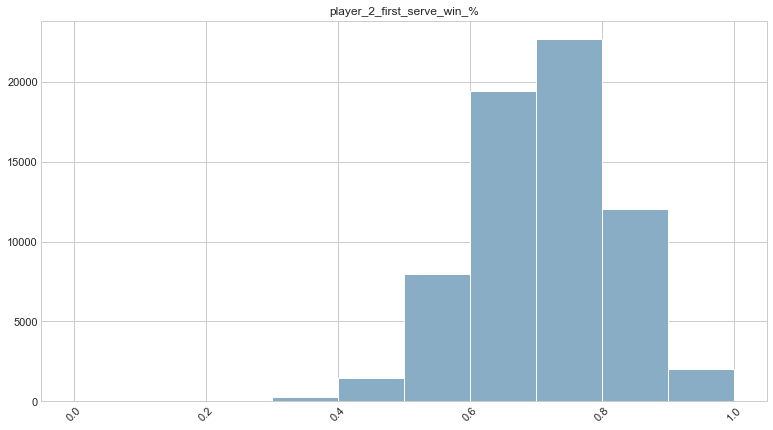

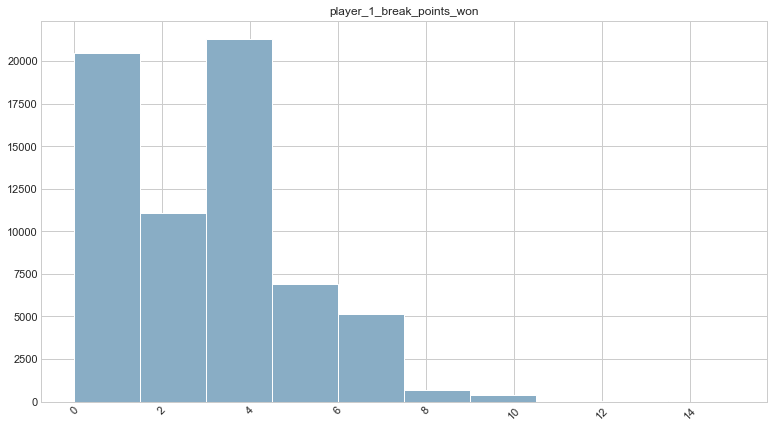

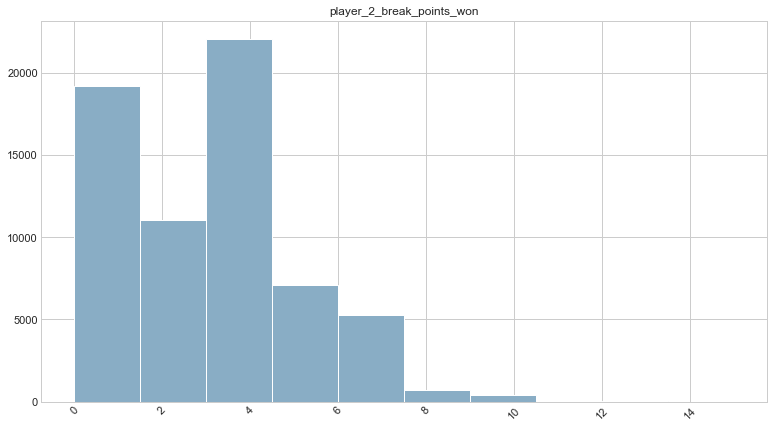

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

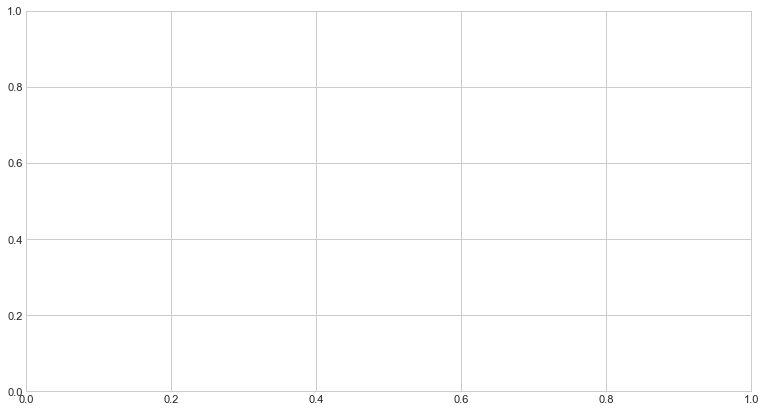

In [90]:
# create histograms of the data
# visualize features for outliers
for col in df:
    df[col].hist()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()
        


In [93]:
def split_data(df):
    from sklearn.model_selection import train_test_split
    '''
    Takes in a dataframe and returns train, validate, and test subset dataframes. 
    '''
    train, test = train_test_split(df, test_size = .2, random_state = 123)
    train, validate = train_test_split(train, test_size = .3, random_state = 123)
    
    return train, validate, test

In [94]:
train, validate, test = split_data(df)